In [1]:
import os
from osgeo import gdal
import sys
sys.path.append('/Users/chanagan/Documents/GitHub/ImageryResources/Functions/')
import TiffTools as tt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal, ndimage
import rioxarray

from pyproj import Proj, Geod
import pygmt

%load_ext autoreload
%autoreload 2

SyntaxError: f-string: expecting '}' (TiffTools.py, line 360)

## HPC with ames

In [ ]:
ssh -K chanagan@hw-login1.gs.doi.net
cd /caldera/hovenweep/projects/usgs/hazards/ehp/chanagan/
scp chanagan@hw-login1.gs.doi.net:/caldera/hovenweep/projects/usgs/hazards/ehp/chanagan/

In [ ]:
July 8th 2025 mods 

WORK IN THE PROJECTS FOLDER!

wget https://ot-data3.sdsc.edu/appRasterSelectService1740605649622-1111472584/rasters_COP30.tar.gz

unzip it

dem_geoid --geoid egm2008 --reverse-adjustment output_hh.tif -o dem

wv_correct ./25FEB2608stereo/25FEB26080048-P1BS-050299533010_01_P001.TIF ./25FEB2608stereo/25FEB26080048-P1BS-050299533010_01_P001.XML ./25FEB2608stereo/25FEB26080048-P1BS-050299533010_01_P001.wv_correct.TIF
wv_correct ./2025E/25FEB2608stereo/25FEB26080138-P1BS-050299533010_01_P002.TIF ./2025E/25FEB2608stereo/25FEB26080138-P1BS-050299533010_01_P002.XML ./2025E/25FEB2608stereo/25FEB26080138-P1BS-050299533010_01_P002.wv_correct.TIF
wv_correct ./2022/2022stereo/22DEC11080314-P1BS-050299531010_01_P001.TIF ./2022/2022stereo/22DEC11080314-P1BS-050299531010_01_P001.XML ./2022/2022stereo/22DEC11080314-P1BS-050299531010_01_P001.wv_correct.TIF
wv_correct ./2022/2022stereo/22DEC11080356-P1BS-050299531010_01_P002.TIF ./2022/2022stereo/22DEC11080356-P1BS-050299531010_01_P002.XML ./2022/2022stereo/22DEC11080356-P1BS-050299531010_01_P002.wv_correct.TIF
wv_correct ./2025W/25FEB26080157-P1BS-050299530010_01_P002.TIF ./2025W/25FEB26080157-P1BS-050299530010_01_P002.XML ./2025W/25FEB26080157-P1BS-050299530010_01_P002.wv_correct.TIF
wv_correct ./2025W/25FEB26080106-P1BS-050299530010_01_P001.TIF ./2025W/25FEB26080106-P1BS-050299530010_01_P001.XML ./2025W/25FEB26080106-P1BS-050299530010_01_P001.wv_correct.TIF

###################
#!/bin/bash
bundle_adjust --ip-per-image 10000 -t dg --camera-weight 0 --tri-weight 0.1 --tri-robust-threshold 0.1 \
    ./2025E/25FEB2608stereo/25FEB26080048-P1BS-050299533010_01_P001.wv_correct.TIF \
    ./2025E/25FEB2608stereo/25FEB26080138-P1BS-050299533010_01_P002.wv_correct.TIF \
    ./2022/2022stereo/22DEC11080314-P1BS-050299531010_01_P001.wv_correct.TIF \
    ./2022/2022stereo/22DEC11080356-P1BS-050299531010_01_P002.wv_correct.TIF \
    ./2025W/25FEB26080157-P1BS-050299530010_01_P002.wv_correct.TIF \
    ./2025W/25FEB26080106-P1BS-050299530010_01_P001.wv_correct.TIF \
    ./2024/20240116stereo/24JAN16050706-P1BS-050278578010_01_P001.TIF \
    ./2024/20240116stereo/24JAN16050550-P1BS-050278578010_01_P002.TIF \
    ./2025E/25FEB2608stereo/25FEB26080048-P1BS-050299533010_01_P001.XML \
    ./2025E/25FEB2608stereo/25FEB26080138-P1BS-050299533010_01_P002.XML \
    ./2022/2022stereo/22DEC11080314-P1BS-050299531010_01_P001.XML \
    ./2022/2022stereo/22DEC11080356-P1BS-050299531010_01_P002.XML \
    ./2025W/25FEB26080157-P1BS-050299530010_01_P002.XML \
    ./2025W/25FEB26080106-P1BS-050299530010_01_P001.XML \
    ./2024/20240116stereo/24JAN16050706-P1BS-050278578010_01_P001.XML \
    ./2024/20240116stereo/24JAN16050550-P1BS-050278578010_01_P002.XML \
    -o dg_csm_model_refined/run

# Set your projection 
proj="+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs"

# List of prefixes
prefixes=("./2025E/25FEB2608stereo/25FEB26080048-P1BS-050299533010_01_P001.wv_correct" \
    "./2025E/25FEB2608stereo/25FEB26080138-P1BS-050299533010_01_P002.wv_correct" \
    "./2022/2022stereo/22DEC11080314-P1BS-050299531010_01_P001.wv_correct" \
    "./2022/2022stereo/22DEC11080356-P1BS-050299531010_01_P002.wv_correct" \
    "./2025W/25FEB26080157-P1BS-050299530010_01_P002.wv_correct" \
    "./2025W/25FEB26080106-P1BS-050299530010_01_P001.wv_correct" \
    "./2024/20240116stereo/24JAN16050706-P1BS-050278578010_01_P001" \
    "./2024/20240116stereo/24JAN16050550-P1BS-050278578010_01_P002")

prefixes2=("./2025E/25FEB2608stereo/25FEB26080048-P1BS-050299533010_01_P001" \
    "./2025E/25FEB2608stereo/25FEB26080138-P1BS-050299533010_01_P002" \
    "./2022/2022stereo/22DEC11080314-P1BS-050299531010_01_P001" \
    "./2022/2022stereo/22DEC11080356-P1BS-050299531010_01_P002" \
    "./2025W/25FEB26080157-P1BS-050299530010_01_P002" \
    "./2025W/25FEB26080106-P1BS-050299530010_01_P001" \
    "./2024/20240116stereo/24JAN16050706-P1BS-050278578010_01_P001" \
    "./2024/20240116stereo/24JAN16050550-P1BS-050278578010_01_P002")

# Loop over each prefix and run mapproject
# Loop over both arrays using index
for i in "${!prefixes[@]}"; do
  IMG="${prefixes[$i]}"
  XMLPREFIX="${prefixes2[$i]}"

  echo "Processing $IMG with XML from $XMLPREFIX..."

  mapproject -t rpc --threads 60 \
    --t_projwin 532947.5 3151094 560947.5 3201094 \
    --tr 0.5 \
    --t_srs "$proj" \
    --bundle-adjust-prefix dg_csm_model_refined/run \
    dem-adj.tif "${IMG}.TIF" "${XMLPREFIX}.XML" "${IMG}.map.TIF"
done


parallel_stereo -t dg --max-disp-spread 200 --processes 64 \
  --accept-provided-mapproj-dem --alignment-method none \
  --stereo-algorithm asp_bm  \
  --subpixel-mode 3 \
  --bundle-adjust-prefix dg_csm_model_refined/run \
  ./2025E/25FEB2608stereo/25FEB26080048-P1BS-050299533010_01_P001.wv_correct.map.TIF \
  ./2025E/25FEB2608stereo/25FEB26080138-P1BS-050299533010_01_P002.wv_correct.map.TIF \
  ./2025E/25FEB2608stereo/25FEB26080048-P1BS-050299533010_01_P001.XML \
  ./2025E/25FEB2608stereo/25FEB26080138-P1BS-050299533010_01_P002.XML \
  run2025E/run dem-adj.tif

parallel_stereo -t dg --max-disp-spread 200 --processes 64 \
  --accept-provided-mapproj-dem --alignment-method none \
  --stereo-algorithm asp_bm  \
  --subpixel-mode 3 \
  --bundle-adjust-prefix dg_csm_model_refined/run \
  ./2022/2022stereo/22DEC11080314-P1BS-050299531010_01_P001.wv_correct.map.TIF \
  ./2022/2022stereo/22DEC11080356-P1BS-050299531010_01_P002.wv_correct.map.TIF \
  ./2022/2022stereo/22DEC11080314-P1BS-050299531010_01_P001.XML \
  ./2022/2022stereo/22DEC11080356-P1BS-050299531010_01_P002.XML \
  run2022/run dem-adj.tif

parallel_stereo -t dg --max-disp-spread 200 --processes 64 \
  --accept-provided-mapproj-dem --alignment-method none \
  --stereo-algorithm asp_bm  \
  --subpixel-mode 3 \
  --bundle-adjust-prefix dg_csm_model_refined/run \
  ./2025W/25FEB26080157-P1BS-050299530010_01_P002.wv_correct.map.TIF \
  ./2025W/25FEB26080106-P1BS-050299530010_01_P001.wv_correct.map.TIF \
  ./2025W/25FEB26080157-P1BS-050299530010_01_P002.XML \
  ./2025W/25FEB26080106-P1BS-050299530010_01_P001.XML \
  run2025W/run dem-adj.tif

parallel_stereo -t dg --max-disp-spread 200 --processes 64 \
  --accept-provided-mapproj-dem --alignment-method none \
  --stereo-algorithm asp_bm  \
  --subpixel-mode 3 \
  --bundle-adjust-prefix dg_csm_model_refined/run \
  ./2024/20240116stereo/24JAN16050706-P1BS-050278578010_01_P001.map.TIF \
  ./2024/20240116stereo/24JAN16050550-P1BS-050278578010_01_P002.map.TIF \
  ./2024/20240116stereo/24JAN16050706-P1BS-050278578010_01_P001.XML \
  ./2024/20240116stereo/24JAN16050550-P1BS-050278578010_01_P002.XML \
  run2024/run dem-adj.tif

proj="+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs"
point2dem --t_srs "$proj" --tr 0.5 --dem-hole-fill-len 100 --orthoimage-hole-fill-len 100 run2025E/run-PC.tif --orthoimage run2025E/run-L.tif
point2dem --t_srs "$proj" --tr 0.5 --dem-hole-fill-len 100 --orthoimage-hole-fill-len 100 run2025W/run-PC.tif --orthoimage run2025W/run-L.tif
point2dem --t_srs "$proj" --tr 0.5 --dem-hole-fill-len 100 --orthoimage-hole-fill-len 100 run2022/run-PC.tif --orthoimage run2022/run-L.tif
point2dem --t_srs "$proj" --tr 0.5 --dem-hole-fill-len 100 --orthoimage-hole-fill-len 100 run2024/run-PC.tif --orthoimage run204//run-L.tif


######################
#!/bin/bash
#SBATCH --account=ehp
#SBATCH --partition=cpu
#SBATCH --time=02-00:00
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=128
#SBATCH --mem=0
#SBATCH --exclusive
#SBATCH --mail-type=ALL
#SBATCH --mail-user=chanagan@usgs.gov
#SBATCH --chdir=/caldera/hovenweep/projects/usgs/hazards/ehp/chanagan/Xizang

export OMP_NUM_THREADS=${SLURM_CPUS_PER_TASK}

./run.sh 
#############################################################

gdalwarp -dstnodata -9999 -ot Float32 -tr 0.5 0.5 -te 532947.500 3151050.500 544017.500 3210468.000 -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES -overwrite run2025W/run-2025WDRG.tif orthos/OrthoPostW-cropped.tif 
gdalwarp -dstnodata -9999 -ot Float32 -tr 0.5 0.5 -te 532947.500 3151050.500 544017.500 3210468.000 -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES -overwrite run2022/run-2022DRG.tif orthos/OrthoPreW-cropped.tif 

gdalwarp -dstnodata -9999 -ot Float32 -tr 0.5 0.5 -te 547922.000 3151050.500 561092.500 3210471.500 -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES -overwrite run2025E/run-2025EDRG.tif orthos/OrthoPostE-cropped.tif 
gdalwarp -dstnodata -9999 -ot Float32 -tr 0.5 0.5 -te 547922.000 3151050.500 561092.500 3210471.500 -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES -overwrite run2024/run-2024DRG.tif orthos/OrthoPreE-cropped.tif 

gdalwarp -dstnodata -9999 -ot Float32 -tr 0.5 0.5 -te 541839.500 3151050.500 551823.500 3210469.000 -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES -overwrite run2024/run-2024DRG.tif orthos/OrthoPreE-Olap-cropped.tif
gdalwarp -dstnodata -9999 -ot Float32 -tr 0.5 0.5 -te 541839.500 3151050.500 551823.500 3210469.000 -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES -overwrite run2025W/run-2025WDRG.tif orthos/OrthoPostW-Olap-cropped.tif

gdalwarp -dstnodata -9999 -ot Float32 -tr 0.5 0.5 -te 532947.500 3151050.500 544017.500 3210468.000 -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES -overwrite run2025W/run-2025WDEM.tif dems/DEMPostW-cropped.tif 
gdalwarp -dstnodata -9999 -ot Float32 -tr 0.5 0.5 -te 532947.500 3151050.500 544017.500 3210468.000 -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES -overwrite run2022/run-2022DEM.tif dems/DEMPreW-cropped.tif 

gdalwarp -dstnodata -9999 -ot Float32 -tr 0.5 0.5 -te 547922.000 3151050.500 561092.500 3210471.500 -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES -overwrite run2025E/run-2025EDEM.tif dems/DEMPostE-cropped.tif 
gdalwarp -dstnodata -9999 -ot Float32 -tr 0.5 0.5 -te 547922.000 3151050.500 561092.500 3210471.500 -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES -overwrite run2024/run-2024DEM.tif dems/DEMPreE-cropped.tif 

gdalwarp -dstnodata -9999 -ot Float32 -tr 0.5 0.5 -te 541839.500 3151050.500 551823.500 3210469.000 -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES -overwrite run2024/run-2024DEM.tif dems/DEMPreE-Olap-cropped.tif
gdalwarp -dstnodata -9999 -ot Float32 -tr 0.5 0.5 -te 541839.500 3151050.500 551823.500 3210469.000 -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES -overwrite run2025W/run-2025WDEM.tif dems/DEMPostW-Olap-cropped.tif

#############################
mm3d Mm2dPosSism OrthoPreE-cropped.tif OrthoPostE-asp-aligned.tif CorMin=0.1 Dequant=false DirMEC='MEC_E/'  
mm3d Mm2dPosSism OrthoPreE-Olap-cropped.tif OrthoPostW-Olap-asp-aligned.tif CorMin=0.1 Dequant=false DirMEC='MEC_Olap/' 
mm3d Mm2dPosSism OrthoPreW-cropped.tif OrthoPostW-asp-aligned.tif CorMin=0.1 Dequant=false DirMEC='MEC_W/' 


## Micmac processing

In [1]:
import numpy as np
from osgeo import gdal
import sys
sys.path.append('/Users/chanagan/Documents/GitHub/ImageryResources/Functions/')
import TiffTools as tt
%load_ext autoreload
%autoreload 2

In [ ]:
stop
# stitch together output
prefixes = np.array([['E','W','E-Olap'],['E','W','W-Olap']])

for i,folder in enumerate(['MEC_E','MEC_W','MEC_Olap']):
    for dir in ['Px1','Px2']:
        im1 = gdal.Open(f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{folder}/{dir}_Num5_DeZoom1_LeChantier_Tile_0_0.tif') 
        im1data = im1.GetRasterBand(1).ReadAsArray()
        im2 = gdal.Open(f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{folder}/{dir}_Num5_DeZoom1_LeChantier_Tile_0_1.tif') 
        im2data = im2.GetRasterBand(1).ReadAsArray()
        im3 = gdal.Open(f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{folder}/{dir}_Num5_DeZoom1_LeChantier_Tile_0_2.tif') 
        im3data = im3.GetRasterBand(1).ReadAsArray()

        stack = np.concat([im1data,im2data,im3data])
        tt.save_geotiff(stack,f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{folder}/{dir}_Num5_DeZoom1_LeChantier.tif',im1.GetGeoTransform(),'')

    im1 = gdal.Open(f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{folder}/Correl_LeChantier_Num_5_Tile_0_0.tif') 
    im1data = im1.GetRasterBand(1).ReadAsArray()
    im2 = gdal.Open(f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{folder}/Correl_LeChantier_Num_5_Tile_0_1.tif') 
    im2data = im2.GetRasterBand(1).ReadAsArray()

    stack = np.concat([im1data,im2data])
    tt.save_geotiff(stack,f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{folder}/Correl_LeChantier_Num_5.tif',im1.GetGeoTransform(),'')

    pref1, pref2 = prefixes[0,i], prefixes[1,i]
    tt.micmacPostProcessing(folder=f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{folder}/',
                             prefiles=[f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/OrthosJuly2025/OrthoPre{pref1}-cropped.tif',
                                       f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/OrthosJuly2025/OrthoPost{pref2}-cropped.tif'],
                             outprefix=f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{folder}/')

In [2]:
# Vertical 2.5 d, bilinear interpolation
prefixes = zip(['E','W','E-Olap'][-1:],['E','W','W-Olap'][-1:],['MEC_E','MEC_W','MEC_Olap'][-1:])
for pref1,pref2,folder in prefixes:
    predem = f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPre{pref1}-cropped.tif'
    postdem = f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPost{pref2}-cropped.tif'

    tt.verticalDispBilin(dem1file=predem,
                         dem2file=postdem,
                         nsfile=f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{folder}/NSmicmac.tif',
                         ewfile=f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{folder}/EWmicmac.tif',
                         outf=f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{folder}/UDmicmac.tif')

/Users/chanagan/miniforge3/envs/image_processing/lib/python3.13/site-packages/osgeo/gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Raster shapes: (118837, 19968) (118837, 19968) (118837, 19968) (118837, 19968)
Saved vertical displacement to: /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/MEC_Olap/UDmicmac.tif


In [ ]:
%%bash
# Merge NS, EW, ud
gdalwarp -t_srs EPSG:32645 -tr 1 1 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/MEC_Olap/EWmicmac.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp1.tif
gdalwarp -t_srs EPSG:32645 -tr 1 1 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/MEC_W/EWmicmac.tif \
        /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp2.tif
gdalwarp -t_srs EPSG:32645 -tr 1 1 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/MEC_E/EWmicmac.tif \
        /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp3.tif
gdal_merge.py -n -9999 -a_nodata -9999 -o /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged1m.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp1.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp2.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp3.tif



gdalwarp -t_srs EPSG:32645 -tr 1 1 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/MEC_Olap/NSmicmac.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp1.tif
gdalwarp -t_srs EPSG:32645 -tr 1 1 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/MEC_W/NSmicmac.tif \
        /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp2.tif
gdalwarp -t_srs EPSG:32645 -tr 1 1 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/MEC_E/NSmicmac.tif \
        /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp3.tif
gdal_merge.py -n -9999 -a_nodata -9999 -o /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged1m.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp1.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp2.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp3.tif

gdalwarp -t_srs EPSG:32645 -tr 1 1 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/MEC_Olap/UDmicmac.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp1.tif
gdalwarp -t_srs EPSG:32645 -tr 1 1 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/MEC_W/UDmicmac.tif \
        /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp2.tif
gdalwarp -t_srs EPSG:32645 -tr 1 1 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/MEC_E/UDmicmac.tif \
        /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp3.tif
gdal_merge.py -n -9999 -a_nodata -9999 -o /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged1m.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp1.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp2.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp3.tif

gdalwarp -t_srs EPSG:32645 -tr 10 10 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPostE-cropped.tif  \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp1.tif
gdalwarp -t_srs EPSG:32645 -tr 10 10 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPostW-cropped.tif \
        /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp2.tif
gdalwarp -t_srs EPSG:32645 -tr 10 10 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPostW-Olap-cropped.tif \
        /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp3.tif
gdal_merge.py -n -9999 -a_nodata -9999 -o /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPost10m.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp1.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp2.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp3.tif

gdalwarp -t_srs EPSG:32645 -tr 1 1 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPostE-cropped.tif  \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp1.tif
gdalwarp -t_srs EPSG:32645 -tr 1 1 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPostW-cropped.tif \
        /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp2.tif
gdalwarp -t_srs EPSG:32645 -tr 1 1 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPostW-Olap-cropped.tif \
        /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp3.tif
gdal_merge.py -n -9999 -a_nodata -9999 -o /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPost1m.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp1.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp2.tif \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/tmp3.tif

# Calc Profile Requirements

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica'],  # Use Helvetica
    'font.size': 8,                    # Global font size
    'axes.titlesize': 8,
    'axes.labelsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.titlesize': 8,
    'pdf.fonttype': 42,                # Embed fonts in PDFs for Illustrator
    'ps.fonttype': 42
})

import geopandas as gpd
from shapely.geometry import Polygon, Point, LineString, MultiLineString, mapping

from pyproj import Proj, Geod
P = Proj('epsg:32645')
G = Geod(ellps='WGS84')

def calcSlopeFrom2Pts(x1,y1,x2,y2):
    '''calculate the slope of a line from two points and the strike of that line in degrees from X AXIS
    returns slope, strike'''
    slope = (y2-y1)/(x2-x1)
    strike = np.degrees(np.arctan(slope)) #this is not from NORTH!! this would be from the x-axis (math, not geology)
    return slope, strike

def calcAzimuthFromNorth(x1,y1,x2,y2):
    '''calculate the azimuth (strike) of a line from North using two points'''
    dx = x2 - x1
    dy = y2 - y1

    # make sure dx and dy are not zero. 
    if (dx == 0.0):
        dx = 0.000001
    if (dy == 0.0):
        dy = 0.000001

    #Calculate angle
    angle = np.degrees(np.abs(np.arctan(dy/dx))) #* (180/np.pi)))
    
    #first quadrant
    if (x2>=x1) and (y2>y1):
        azimuth = 90.0 - angle
        # print('first q')
    #second quadrant
    elif (x2>x1) and (y2<=y1):
        azimuth = angle + 90.0
        # print('second q')
    #third quadrant
    elif (x2<=x1) and (y2<y1):
        azimuth = 270.0 - angle
        # print('third q')
    #fourth quadrant
    else:
        azimuth = 270.0 + angle
        # print('fourth q')

    return azimuth
def calcPerpProfile(orig_strike, profile_length, profile_width, center_point): 
    '''calculate a profile perpendicular to a line from a fault strike and a center point.
    return the profile_line as LineString and profile_swath as Polygon
    orig_strike of fault in degrees
    profile_length in meters = TOTAL length
    profile_width in meters = TOTAL width
    center_point as (x1,y1)
    returns profile_line, profile_swath'''
    
    from shapely.geometry import Point, LineString, Polygon
    
    profile_strike = orig_strike + 90
    profile_angle = np.radians(profile_strike)
    
    # calc perp_line start point, profile_length/2 away from center point
    x = center_point[0] + (profile_length/2) * np.cos(profile_angle)
    y = center_point[1] + (profile_length/2) * np.sin(profile_angle)
    startpt = Point(x,y)
    
    # calc perp_line end point, profile_length/2 away from center point
    x = center_point[0] - (profile_length/2) * np.cos(profile_angle)
    y = center_point[1] - (profile_length/2) * np.sin(profile_angle)
    endpt = Point(x,y)
    
    profile_line = LineString([startpt,endpt])
    profile_swath = profile_line.buffer(profile_width/2,16,cap_style=3)
    return profile_line, profile_swath

def generateProfiles(shapefile_lines_path, profile_length, profile_width, profile_spacing,plot=True,verbose=False,save=False,prefix='all',folder='./'): #save_shp=False):
    '''
    generates profiles perpendicular to lines in a shapefile.
    optionally plots input shapefile lines and output profile swaths. default is plot=True. 
    
    inputs are:
    shapefile_lines_path - path location of the shapefile. shapefile must be lines. best if in a UTM coordinate system.
    profile_length - TOTAL length of the profiles in the same units as the shapefile coordinate system (i.e., m if in UTM)
    profile_width - TOTAL width of the profiles in the same units as the shapefile coordinate system (i.e., m if in UTM)
    profile_spacing - distance between each profile in the same units as the shapefile coordinate system (i.e., m if in UTM)
    
    outputs are:
    profile_swaths = geopandas geodataframe of POLYGON features, the profile swath.
    profile_lines = geopandas geodataframe of LINE features, the centerline of each profile perpendicular to the shapefile lines.
    profile_centerpts = geopandas geodataframe of POINT features, the midpoint of each profile line along the shapefile lines.
    
    exports:
    swaths, profiles, centerpts in geoJSON format
    strikes, n_profiles in np format
    
    '''
    
    print('profiles are',profile_width,'m wide,',profile_length,'m long, and',profile_spacing,'m apart')
    
    # read in shapefile lines
    lines = gpd.read_file(shapefile_lines_path)
    # Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
    lines = lines.explode(index_parts=True) # this turns multipart lines into single part lines so that profiles remain perpendicular to each line segment if it changes strike...but often doesn't work in Python and might need to do in QGIS first and use the exploded lines shapefile as input file
    lines = lines.reset_index(drop=True) # reset the index because we just added a bunch of lines
    print('CRS of shapefile:', lines.crs)
    
    # initialize geodataframes to hold ALL swath, profile, center_pt, strike info
    ## starting with empty dataframes because we don't know the total size yet
    # this throws a filterwarning that i'm ignoring that you can't initialize a gdf without a CRS...will need to fix eventually
    all_swaths = gpd.GeoDataFrame(geometry=[], crs=lines.crs)#geometry=gpd.points_from_xy(x,y)) # where x and y = np.zeros(len(lines))...but if start this way will have a bunch of nonesense/empty lines to remove later, but it didn't like it when I tried to start with one point
    all_profiles = gpd.GeoDataFrame(geometry=[], crs=lines.crs)#geometry=gpd.points_from_xy(x,y))
    all_centerpts = gpd.GeoDataFrame(geometry=[], crs=lines.crs)#geometry=gpd.points_from_xy(x,y))
    all_strikes = np.ones(len(lines),dtype=float)
    all_swath_strikes = np.array([],dtype=float)
    n_profiles= np.ones(len(lines),dtype=int)
    all_azimuths = np.ones(len(lines),dtype=float)
    
    for i, row in lines.iterrows():
        line_geom = row.geometry
        coords = list(line_geom.coords)
    
        # initialize per-line storage
        swaths_list = []
        profiles_list = []
        centerpts_list = []
        strikes_list = []
        azimuths_list = []
    
        for j in range(len(coords) - 1):
            x1, y1 = coords[j]
            x2, y2 = coords[j + 1]
            seg_length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            if seg_length == 0:
                continue
            
            dx = (x2 - x1) / seg_length
            dy = (y2 - y1) / seg_length
            
            # Ensure at least one profile, even on short segments
            if seg_length < profile_spacing:
                dists = [seg_length / 2]
            else:
                dists = np.arange(profile_spacing / 2, seg_length, profile_spacing)
            
            for dist_along in dists:
                cx = x1 + dx * dist_along
                cy = y1 + dy * dist_along
            
                slope, strike = calcSlopeFrom2Pts(x1, y1, x2, y2)
                azimuth = calcAzimuthFromNorth(x1, y1, x2, y2)
            
                profile_line, profile_swath = calcPerpProfile(strike, profile_length, profile_width, (cx, cy))
            
                swaths_list.append(profile_swath)
                profiles_list.append(profile_line)
                centerpts_list.append(Point(cx, cy))
                strikes_list.append(strike)
                azimuths_list.append(azimuth)


    
        # convert lists to GeoDataFrames
        swaths = gpd.GeoDataFrame(geometry=swaths_list, crs=lines.crs)
        profiles = gpd.GeoDataFrame(geometry=profiles_list, crs=lines.crs)
        center_points = gpd.GeoDataFrame(geometry=centerpts_list, crs=lines.crs)
        center_points['fault_azimuth'] = azimuths_list  # last segment azimuth; optional: store full list
    
        all_swaths = pd.concat([all_swaths, swaths])
        all_profiles = pd.concat([all_profiles, profiles])
        all_centerpts = pd.concat([all_centerpts, center_points])
        all_swath_strikes = np.concatenate([all_swath_strikes, np.array(strikes_list)])
        all_strikes[i] = np.mean(strikes_list)
        all_azimuths[i] = np.mean(azimuths_list)
        n_profiles[i] = len(strikes_list)
    
        # reset index because otherwise the index is duplicated for each line in the shapefile
        all_swaths = all_swaths.reset_index(drop=True)
        all_profiles = all_profiles.reset_index(drop=True)
        all_centerpts = all_centerpts.reset_index(drop=True)
    
        # ensure profiles have same CRS as input shapefile
        all_swaths = all_swaths.set_crs(lines.crs)
        all_profiles = all_profiles.set_crs(lines.crs)
        all_centerpts = all_centerpts.set_crs(lines.crs)
    
    # to plot or not to plot
    if plot==True:
        fig,ax = plt.subplots(figsize=(8,8))
        all_swaths.plot(ax=ax,alpha=.2,color='k')
        all_profiles.plot(ax=ax,color='k',lw=.5)
        all_centerpts.plot(ax=ax,color='b')
        lines.plot(ax=ax,color='r',lw=.75)
        plt.show()


    if save==True:
        all_swaths.to_file(folder+'%s_swaths_%sprofiles.geojson' %(prefix,sum(n_profiles)), driver='GeoJSON') 
        all_profiles.to_file(folder+'%s_profiles_%sprofiles.geojson' %(prefix,sum(n_profiles)), driver='GeoJSON')  
        all_centerpts.to_file(folder+'%s_centerpts_%sprofiles.geojson' %(prefix,sum(n_profiles)), driver='GeoJSON') 
        np.save(folder+'%s_swath_strikes_%sprofiles.npy' %(prefix,sum(n_profiles)),all_swath_strikes, allow_pickle=True,)
        np.save(folder+'%s_strikes_%sprofiles.npy' %(prefix,sum(n_profiles)),all_strikes,allow_pickle=True,)
        np.save(folder+'%s_azimuths_%sprofiles.npy' %(prefix,sum(n_profiles)),all_azimuths,allow_pickle=True,)
        np.save(folder+'%s_n_profiles_%sprofiles.npy' %(prefix,sum(n_profiles)),n_profiles,allow_pickle=True,)



    return all_swaths, all_swath_strikes, all_profiles, all_centerpts, all_strikes, n_profiles, all_azimuths

def projectParPerp(ns, ew, az):
    theta = (az)*np.pi/180
    par = ns*np.cos(theta)+ew*np.sin(theta)
    perp = -1*ns*np.sin(theta)+ew*np.cos(theta)
    return par.flatten(), perp.flatten()

# Function to compute MAD
def mad(x):
    median = np.nanmedian(x)
    return np.nanmedian(np.abs(x - median))
def bin_and_median(arr, window):
    n = len(arr)
    n_trim = n - (n % window)  # make divisible
    arr_trim = arr[:n_trim].reshape(-1, window)
    medians = np.nanmedian(arr_trim, axis=1)
    mads = np.apply_along_axis(mad, 1, arr_trim)
    return medians, mads

# Create and Plot EW Profiles

saving profiles to:  /Volumes/Tibet/XizangWVProcessing/Profiles/
profiles are 2500 m wide, 35000 m long, and 2500 m apart
CRS of shapefile: EPSG:32645


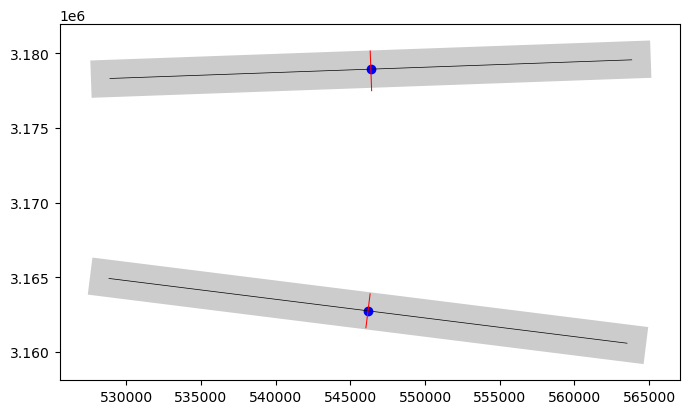

2 total profiles


In [3]:
## MAKE PROFILES
rewrite = False

label = 'Tibet'

fault_map_path = '/Volumes/Tibet/XizangWVProcessing/GIS/ProfileGrid.geojson'
folder = '/Volumes/Tibet/XizangWVProcessing/Profiles/'

print('saving profiles to: ',folder)
fault_map = gpd.read_file(fault_map_path) # complete representation of faulting to plot


profile_length = 35000 # in meters, not pixels
pixel_res = 1 # m
profile_width = 2500 # In meters 
profile_spacing = profile_width #in meters 
prefix = 'TibetProfilesEW_20250107'

swaths, swath_strikes, profiles, center_points, strikes, n_profs, azimuths = generateProfiles(fault_map_path,profile_length,profile_width,profile_spacing,save=rewrite,prefix=prefix,folder=folder)
## if get a warning about multipart geometries, use conda environment geospatial2
n_profs = np.sum(n_profs)
#strikes, n_profs
#print(len(n_profs),'exploded segments with',sum(n_profs),'total profiles')
print(len(swaths), 'total profiles')

In [4]:
import rasterio

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/1885402104.py:19: SyntaxWarning: invalid escape sequence '\s'
  depth_pts = pd.read_csv('/Volumes/Tibet/XizangWVProcessing/SupportingData/relocated_aftershocks_20250108-20250118.txt',sep='\s+',skiprows=2)


0 of 2


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/1584561257.py:225: RuntimeWarning: All-NaN slice encountered
  medians = np.nanmedian(arr_trim, axis=1)
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/1584561257.py:219: RuntimeWarning: All-NaN slice encountered
  median = np.nanmedian(x)
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/1584561257.py:220: RuntimeWarning: All-NaN slice encountered
  return np.nanmedian(np.abs(x - median))
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/1885402104.py:241: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels([f"{lon:.3f}" for lon in xticks_lon])


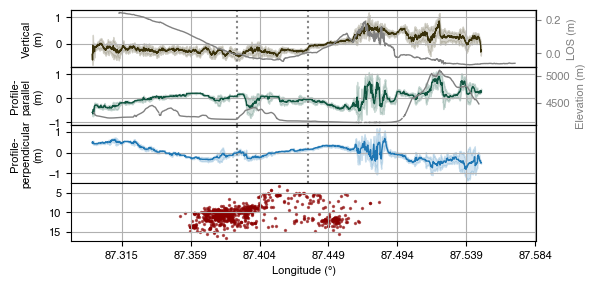

1 of 2


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/1584561257.py:225: RuntimeWarning: All-NaN slice encountered
  medians = np.nanmedian(arr_trim, axis=1)
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/1584561257.py:219: RuntimeWarning: All-NaN slice encountered
  median = np.nanmedian(x)
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/1584561257.py:220: RuntimeWarning: All-NaN slice encountered
  return np.nanmedian(np.abs(x - median))
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/1885402104.py:241: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels([f"{lon:.3f}" for lon in xticks_lon])


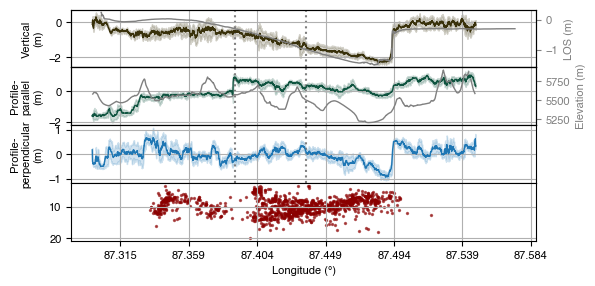

In [ ]:
profile_length = 35000
swath_width = 2500       # m
resolution = 10 #pixel_res       # m

# Read in the fault points
label = 'TibetProfilesEW_20250107'

points = gpd.read_file('/Volumes/Tibet/XizangWVProcessing/Profiles/TibetProfilesEW_20250107_centerpts_2profiles.geojson')

points = gpd.GeoDataFrame(points)

# Read the rasters
ns = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged1m.tif')
ew = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged1m.tif')
ud = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged1m.tif')
dem = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPost10m.tif')
los = rasterio.open('/Volumes/Tibet/XizangWVProcessing/SupportingData/ALOS_ZoeYin/A2_A301_F2-7_los_ll.tiff')
# Seismicity
depth_pts = pd.read_csv('/Volumes/Tibet/XizangWVProcessing/SupportingData/relocated_aftershocks_20250108-20250118.txt',sep='\s+',skiprows=2)
depth_pts['easting'], depth_pts['northing'] = P(depth_pts['longitude'],depth_pts['latitude'])

figpath = '/Volumes/Tibet/XizangWVProcessing/Profiles/pngs/'
savepath= '/Volumes/Tibet/XizangWVProcessing/Profiles/'

results_list = []  # We'll collect dictionaries here and build a DataFrame after the loop

for i in range(0,len(points)):
    print(i, 'of', len(points))

    lon, lat = P(points.geometry.x.iloc[i], points.geometry.y.iloc[i], inverse=True)
    lon1, lat1, _ = G.fwd(lon, lat, points.fault_azimuth.iloc[i] - 90, profile_length / 2)
    lon2, lat2, _ = G.fwd(lon, lat, points.fault_azimuth.iloc[i] + 90, profile_length / 2)
    tmppts = np.array(G.npts(lon1=lon1, lat1=lat1, lon2=lon2, lat2=lat2, npts=profile_length / resolution))

    starts = G.fwd(tmppts[:, 0], tmppts[:, 1], [points.fault_azimuth.iloc[i]] * len(tmppts), [swath_width / 2] * len(tmppts))
    ends = G.fwd(tmppts[:, 0], tmppts[:, 1], [points.fault_azimuth.iloc[i] + 180] * len(tmppts), [swath_width / 2] * len(tmppts))

    map_object = np.array(list(map(
        lambda lon1, lat1, lon2, lat2: G.npts(lon1, lat1, lon2, lat2, swath_width / resolution),
        starts[0], starts[1], ends[0], ends[1]
    )))

    pts = map_object.reshape(len(starts[0]) * int(swath_width / resolution), 2)
    ptsLL = pts
    pts = P(pts[:, 0], pts[:, 1])
    pts = np.column_stack(pts)
    dist = np.arange(-profile_length / 2, profile_length / 2, resolution)
    dists = np.repeat(dist, int(swath_width / resolution))

    utm_n = np.repeat(P(tmppts[:,0], tmppts[:,1])[1],int(swath_width / resolution))
    utm_e = np.repeat(P(tmppts[:,0], tmppts[:,1])[0],int(swath_width / resolution))

    ### seismicity
    # Create unit vectors
    az_rad = np.deg2rad(points.fault_azimuth.iloc[i])
    dx = np.cos(az_rad)
    dy = np.sin(az_rad)

    # Vectors from profile center
    rel_e = depth_pts.easting.values - points.geometry.x.iloc[i]
    rel_n = depth_pts.northing.values - points.geometry.y.iloc[i]
    
    # Project onto perpendicular axis (distance from centerline)
    along_dist = rel_e * dx + rel_n * dy
    perp_dist = -rel_e * dy + rel_n * dx
    
    # Filter seismicity points inside swath
    mask = (
        (np.abs(perp_dist) <= swath_width) & # grab seismicity within 2 swatch widths
        (np.abs(along_dist) <= profile_length / 2)
    )

    seis_swath = depth_pts[mask].copy()

    # Northing and easting for x-label later
    if abs(np.sin(points.fault_azimuth.iloc[i]*np.pi/180)) >= np.sin(45*np.pi/180):
        # Use easting
        utm = np.repeat(P(tmppts[:,0], tmppts[:,1])[1],int(swath_width / resolution))
        xlabel= 'Northing'
        seisx = seis_swath.northing
    else: # use northing
        utm = np.repeat(P(tmppts[:,0], tmppts[:,1])[0],int(swath_width / resolution))
        xlabel= 'Easting'
        seisx = seis_swath.easting
    
    assert pts.shape[0] == dists.shape[0], "Mismatch between number of points and distances"

    # Sample DEM at centerline
    elev_pts = P(tmppts[:, 0], tmppts[:, 1])  # convert to UTM
    elev_coords = np.column_stack(elev_pts)
    elev_samples = np.array([x for x in dem.sample(elev_coords)])
    elev_samples[elev_samples <= 3000] = np.nan  # Handle NoData

    # Sample los at centerline
    los_samples = np.array([x for x in los.sample(ptsLL)])
    #los_samples[los_samples == -9999] = np.nan  # Handle NoData


    ### Sample rasters
    ns_samps = np.array([x for x in ns.sample(pts)])
    ns_samps[ns_samps == -9999] = np.nan
    ew_samps = np.array([x for x in ew.sample(pts)])
    ew_samps[ew_samps == -9999] = np.nan
    ud_samps = np.array([x for x in ud.sample(pts)])
    ud_samps[ud_samps == -9999] = np.nan

    par, perp = projectParPerp(
        ns_samps - np.nanmean(ns_samps),
        ew_samps - np.nanmean(ew_samps),
        points.fault_azimuth.iloc[i]-180
    )

    # Calculate medians at centerpoints of swath
    window = int(swath_width/resolution)
    min_periods = int(window/2)

    #Apply to perp and vertical samples
    par_medians, par_mads = bin_and_median(np.array(par), window)
    perp_medians, perp_mads = bin_and_median(np.array(perp), window)
    vert_medians, vert_mads = bin_and_median(np.array(ud_samps), window)
    los_medians, los_mads = bin_and_median(np.array(los_samples), window)
    utm_medians, _ = bin_and_median(np.array(utm),window)

 
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(
        nrows=4, ncols=1, figsize=(6, 3), sharex=True,
        gridspec_kw={'hspace': 0}
        )
    plt.style.use('seaborn-v0_8-colorblind')
    # --- Plot VERTICAL (UD) ---
    ax1.plot(
        utm_medians,
        vert_medians,
        color="#39310B",
        linewidth=1,
        zorder=7
    )
    ax1.fill_between(
        utm_medians,
        (vert_medians - vert_mads),
        (vert_medians + vert_mads),
        color="#39310B",
        alpha=0.2,
    )
    ax1.set_ylabel('Vertical\n(m)')
    ax1.tick_params(axis='x', labelbottom=False)
    ax1.grid(True)
    # Add elevation los second Y-axis
    ax1_elev = ax1.twinx()
    # Plot elevation behind as grey transparent fill
    ax1_elev.plot(
        utm_medians,
        los_medians/1000,
        color='grey',
        linewidth=1,
        zorder=1,
    )
    # Optionally reduce visual weight of elevation axis
    ax1_elev.tick_params(axis='y',  colors='grey')
    ax1_elev.set_ylabel("LOS (m)", color='grey')
    # --- Plot PERPENDICULAR ---
    ax2.plot(
        utm_medians,
        perp_medians,
        color="#105440",
        linewidth=1,
        zorder=7
    )
    ax2.fill_between(
        utm_medians,
        (perp_medians - perp_mads),
        (perp_medians + perp_mads),
        color="#105440",
        alpha=0.2,
    )
    ax2.set_ylabel('Profile-\nparallel\n(m)')
    ax2.set_xlabel(f'{xlabel} (m)')
    #ax2.legend(fontsize=8, loc='lower left')
    ax2.grid(True)
    # Add elevation on second Y-axis
    ax2_elev = ax2.twinx()
    # Plot elevation behind as grey transparent fill
    ax2_elev.plot(
        utm_medians,
        elev_samples,
        color='grey',
        linewidth=1,
        zorder=1,
        label='Elevation'
    )
    # Optionally reduce visual weight of elevation axis
    ax2_elev.tick_params(axis='y', colors='grey')
    ax2_elev.set_ylabel("Elevation (m)", color='grey')
    # --- Plot PARALLEL ---
    ax3.plot(
        utm_medians,
        par_medians,
        color="#1f77b4",
        linewidth=1,
        zorder=7
    )

    ax3.fill_between(
        utm_medians,
        (par_medians - par_mads),
        (par_medians + par_mads),
        color="#1f77b4",
        alpha=0.2
    )
    ax3.set_ylabel('Profile-\nperpendicular\n(m)')
    ax3.tick_params(axis='x', labelbottom=False)
    ax3.grid(True)

    # Plot image boundaries: 
    if xlabel == 'Easting':
        ax1.axvline(548547.496,linestyle=':',c='grey',zorder=1)
        ax2.axvline(548547.496,linestyle=':',c='grey',zorder=1)
        ax1.axvline(543379.578,linestyle=':',c='grey',zorder=1)
        ax2.axvline(543379.578,linestyle=':',c='grey',zorder=1)
        ax3.axvline(548547.496,linestyle=':',c='grey',zorder=1)
        ax3.axvline(543379.578,linestyle=':',c='grey',zorder=1)
        seisx = seis_swath.easting
    else:
        seisx = seis_swath.northing
    # --- Plot DEPTH CROSS SECTION ---
    ax4.scatter(
        seisx,
        seis_swath.depth,
        s=2, color='darkred', alpha=0.6
    )
    ax4.invert_yaxis()
    # --- Convert axis ticks to lon/lat labels ---
    from pyproj import Transformer
    transformer = Transformer.from_crs("EPSG:32645", "EPSG:4326", always_xy=True)
    # Get current ticks in projected coordinates
    xticks = ax4.get_xticks()
    yticks = ax4.get_yticks()
    # Convert to lon/lat
    xticks_lon, _ = transformer.transform(xticks, np.full_like(xticks, yticks[0]))
    # Set formatted tick labels
    ax4.set_xticklabels([f"{lon:.3f}" for lon in xticks_lon])
    # Update labels
    ax4.set_xlabel("Longitude (°)")
    ax4.set_ylabel("Depth\n(km)")
    ax4.grid(True)
    # Optional offset annotation (same as your original)
    offset_text = ""
    ax1.text(0.98, 0.95, offset_text.strip(),
             ha='right', va='top',
             transform=ax1.transAxes,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

    fig.align_ylabels([ax1, ax2, ax3])
    plt.savefig(f'{figpath}Profile{i}_{len(points)}_ProfLen{profile_length}_SwathWidth{swath_width}_{label}.svg', dpi=300)
    plt.show()

    # Trim arrays to same length (in case of rounding errors)
    n_bins = len(perp_medians)
    results_df = pd.DataFrame({
        'profile_id': [i] * n_bins,
        'easting': utm_e[::window][:n_bins],
        'northing': utm_n[::window][:n_bins],
        'prof_dist': dist,
        'par_median': par_medians,
        'par_mad': par_mads,
        'perp_median': perp_medians,
        'perp_mad': perp_mads,
        'vert_median': vert_medians,
        'vert_mad': vert_mads,
        'los_median':los_medians,
        'los_mad':los_mads
    })

    # Append to a master DataFrame
    if i == 0:
        all_profiles_df = results_df.copy()
    else:
        all_profiles_df = pd.concat([all_profiles_df, results_df], ignore_index=True)

all_profiles_df.to_csv(
    f'{savepath}ProfileRollingStats_ProfLen{profile_length}_SwathWidth{swath_width}_{label}.csv',
    index=False)

In [10]:
from matplotlib import rcParams

rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica'],  # Use Helvetica
    'font.size': 8,                    # Global font size
    'axes.titlesize': 8,
    'axes.labelsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.titlesize': 8,
    'pdf.fonttype': 42,                # Embed fonts in PDFs for Illustrator
    'ps.fonttype': 42
})

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/379142864.py:117: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels([f"{lon:.3f}" for lon in xticks_lon])


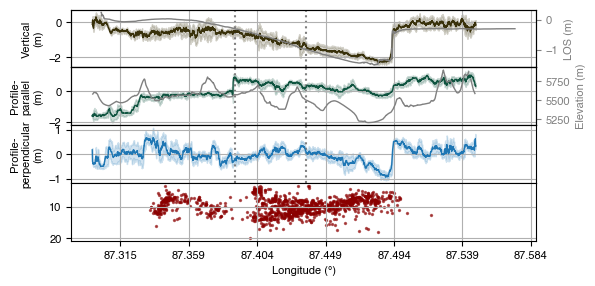

In [18]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows=4, ncols=1, figsize=(6, 3), sharex=True,
    gridspec_kw={'hspace': 0}
    )
plt.style.use('seaborn-v0_8-colorblind')
# --- Plot VERTICAL (UD) ---
ax1.plot(
    utm_medians,
    vert_medians,
    color="#39310B",
    linewidth=1,
    zorder=7
)
ax1.fill_between(
    utm_medians,
    (vert_medians - vert_mads),
    (vert_medians + vert_mads),
    color="#39310B",
    alpha=0.2,
)
ax1.set_ylabel('Vertical\n(m)')
ax1.tick_params(axis='x', labelbottom=False)
ax1.grid(True)
# Add elevation los second Y-axis
ax1_elev = ax1.twinx()
# Plot elevation behind as grey transparent fill
ax1_elev.plot(
    utm_medians,
    los_medians/1000,
    color='grey',
    linewidth=1,
    zorder=1,
)
# Optionally reduce visual weight of elevation axis
ax1_elev.tick_params(axis='y',  colors='grey')
ax1_elev.set_ylabel("LOS (m)", color='grey')
# --- Plot PERPENDICULAR ---
ax2.plot(
    utm_medians,
    perp_medians,
    color="#105440",
    linewidth=1,
    zorder=7
)
ax2.fill_between(
    utm_medians,
    (perp_medians - perp_mads),
    (perp_medians + perp_mads),
    color="#105440",
    alpha=0.2,
)
ax2.set_ylabel('Profile-\nparallel\n(m)')
ax2.set_xlabel(f'{xlabel} (m)')
#ax2.legend(fontsize=8, loc='lower left')
ax2.grid(True)
# Add elevation on second Y-axis
ax2_elev = ax2.twinx()
# Plot elevation behind as grey transparent fill
ax2_elev.plot(
    utm_medians,
    elev_samples,
    color='grey',
    linewidth=1,
    zorder=1,
    label='Elevation'
)
# Optionally reduce visual weight of elevation axis
ax2_elev.tick_params(axis='y', colors='grey')
ax2_elev.set_ylabel("Elevation (m)", color='grey')
# --- Plot PARALLEL ---
ax3.plot(
    utm_medians,
    par_medians,
    color="#1f77b4",
    linewidth=1,
    zorder=7
)

ax3.fill_between(
    utm_medians,
    (par_medians - par_mads),
    (par_medians + par_mads),
    color="#1f77b4",
    alpha=0.2
)
ax3.set_ylabel('Profile-\nperpendicular\n(m)')
ax3.tick_params(axis='x', labelbottom=False)
ax3.grid(True)

# Plot image boundaries: 
if xlabel == 'Easting':
    ax1.axvline(548547.496,linestyle=':',c='grey',zorder=1)
    ax2.axvline(548547.496,linestyle=':',c='grey',zorder=1)
    ax1.axvline(543379.578,linestyle=':',c='grey',zorder=1)
    ax2.axvline(543379.578,linestyle=':',c='grey',zorder=1)
    ax3.axvline(548547.496,linestyle=':',c='grey',zorder=1)
    ax3.axvline(543379.578,linestyle=':',c='grey',zorder=1)
    seisx = seis_swath.easting
else:
    seisx = seis_swath.northing
# --- Plot DEPTH CROSS SECTION ---
ax4.scatter(
    seisx,
    seis_swath.depth,
    s=2, color='darkred', alpha=0.6
)
ax4.invert_yaxis()
# --- Convert axis ticks to lon/lat labels ---
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:32645", "EPSG:4326", always_xy=True)
# Get current ticks in projected coordinates
xticks = ax4.get_xticks()
yticks = ax4.get_yticks()
# Convert to lon/lat
xticks_lon, _ = transformer.transform(xticks, np.full_like(xticks, yticks[0]))
# Set formatted tick labels
ax4.set_xticklabels([f"{lon:.3f}" for lon in xticks_lon])
# Update labels
ax4.set_xlabel("Longitude (°)")
ax4.grid(True)
# Optional offset annotation (same as your original)
offset_text = ""
ax1.text(0.98, 0.95, offset_text.strip(),
         ha='right', va='top',
         transform=ax1.transAxes,
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

fig.align_ylabels([ax1, ax2, ax3])
plt.savefig(f'{figpath}Profile{i}_{len(points)}_ProfLen{profile_length}_SwathWidth{swath_width}_{label}.svg', dpi=300)
plt.show()

# Create and Plot Map and NS Profile

saving profiles to:  /Volumes/Tibet/XizangWVProcessing/Profiles/
profiles are 2500 m wide, 35000 m long, and 2500 m apart
CRS of shapefile: EPSG:32645


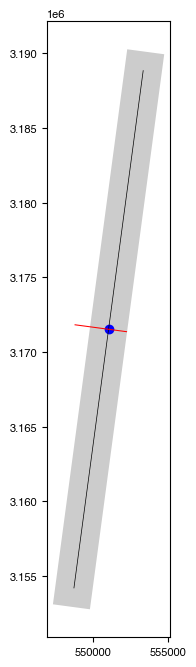

1 total profiles


In [20]:
## MAKE PROFILES
rewrite = False

label = 'Tibet'

fault_map_path = '/Volumes/Tibet/XizangWVProcessing/GIS/ProfilesTargeted.geojson'
folder = '/Volumes/Tibet/XizangWVProcessing/Profiles/'

print('saving profiles to: ',folder)
fault_map = gpd.read_file(fault_map_path) # complete representation of faulting to plot


profile_length = 35000 # in meters, not pixels
pixel_res = 1 # m
profile_width = 2500 # In meters 
profile_spacing = profile_width #in meters 
prefix = 'TibetProfilesTargeted_20250107'

swaths, swath_strikes, profiles, center_points, strikes, n_profs, azimuths = generateProfiles(fault_map_path,profile_length,profile_width,profile_spacing,save=rewrite,prefix=prefix,folder=folder)
## if get a warning about multipart geometries, use conda environment geospatial2
n_profs = np.sum(n_profs)
#strikes, n_profs
#print(len(n_profs),'exploded segments with',sum(n_profs),'total profiles')
print(len(swaths), 'total profiles')

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/2906743635.py:18: SyntaxWarning: invalid escape sequence '\s'
  depth_pts = pd.read_csv('/Volumes/Tibet/XizangWVProcessing/SupportingData/relocated_aftershocks_20250108-20250118.txt',sep='\s+',skiprows=2)


0 of 1


/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/2906743635.py:18: SyntaxWarning: invalid escape sequence '\s'
  depth_pts = pd.read_csv('/Volumes/Tibet/XizangWVProcessing/SupportingData/relocated_aftershocks_20250108-20250118.txt',sep='\s+',skiprows=2)


NameError: name 'make_axes_locatable' is not defined

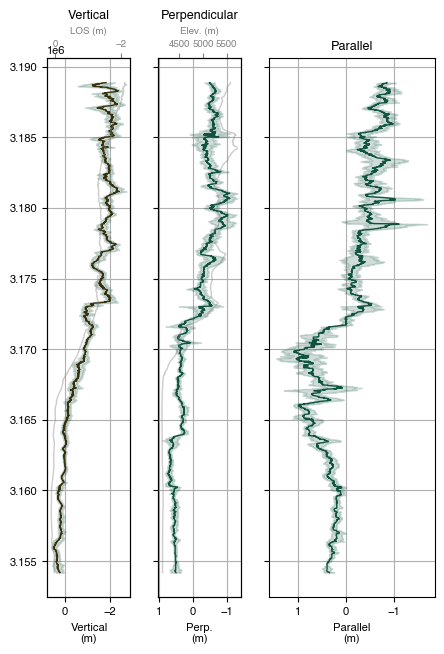

In [ ]:
## CALC AND PLOT PROFILES
# --- Parameters ---
profile_length = 35000  # m
swath_width = 2500               # m
resolution = 10                 # m (pixel res)
label = prefix


# --- File paths ---
points = gpd.read_file('/Volumes/Tibet/XizangWVProcessing/Profiles/TibetProfilesTargeted_20250107_centerpts_1profiles.geojson')
ns = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged1m.tif')
ew = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged1m.tif')
ud = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged1m.tif')
dem = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPost10m.tif')
los = rasterio.open('/Volumes/Tibet/XizangWVProcessing/SupportingData/ALOS_ZoeYin/A2_A301_F2-7_los_ll.tiff')

# Seismicity
depth_pts = pd.read_csv('/Volumes/Tibet/XizangWVProcessing/SupportingData/relocated_aftershocks_20250108-20250118.txt',sep='\s+',skiprows=2)
depth_pts['easting'], depth_pts['northing'] = P(depth_pts['longitude'],depth_pts['latitude'])

figpath = '/Volumes/Tibet/XizangWVProcessing/Profiles/pngs/'
savepath = '/Volumes/Tibet/XizangWVProcessing/Profiles/'

from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- Profile Sampling Loop ---
results_list = []

for i in range(0,len(points)):
    print(i, 'of', len(points))

    lon, lat = P(points.geometry.x.iloc[i], points.geometry.y.iloc[i], inverse=True)
    lon1, lat1, _ = G.fwd(lon, lat, points.fault_azimuth.iloc[i] - 90, profile_length / 2)
    lon2, lat2, _ = G.fwd(lon, lat, points.fault_azimuth.iloc[i] + 90, profile_length / 2)
    tmppts = np.array(G.npts(lon1=lon1, lat1=lat1, lon2=lon2, lat2=lat2, npts=profile_length / resolution))

    starts = G.fwd(tmppts[:, 0], tmppts[:, 1], [points.fault_azimuth.iloc[i]] * len(tmppts), [swath_width / 2] * len(tmppts))
    ends = G.fwd(tmppts[:, 0], tmppts[:, 1], [points.fault_azimuth.iloc[i] + 180] * len(tmppts), [swath_width / 2] * len(tmppts))

    map_object = np.array(list(map(
        lambda lon1, lat1, lon2, lat2: G.npts(lon1, lat1, lon2, lat2, swath_width / resolution),
        starts[0], starts[1], ends[0], ends[1]
    )))

    pts = map_object.reshape(len(starts[0]) * int(swath_width / resolution), 2)
    ptsLL = pts
    pts = P(pts[:, 0], pts[:, 1])
    pts = np.column_stack(pts)
    dist = np.arange(-profile_length / 2, profile_length / 2, resolution)
    dists = np.repeat(dist, int(swath_width / resolution))

    utm_n = np.repeat(P(tmppts[:,0], tmppts[:,1])[1],int(swath_width / resolution))
    utm_e = np.repeat(P(tmppts[:,0], tmppts[:,1])[0],int(swath_width / resolution))

    ### seismicity
    # Create unit vectors
    az_rad = np.deg2rad(points.fault_azimuth.iloc[i])
    dx = np.cos(az_rad)
    dy = np.sin(az_rad)

    # Vectors from profile center
    rel_e = depth_pts.easting.values - points.geometry.x.iloc[i]
    rel_n = depth_pts.northing.values - points.geometry.y.iloc[i]
    
    # Project onto perpendicular axis (distance from centerline)
    along_dist = rel_e * dx + rel_n * dy
    perp_dist = -rel_e * dy + rel_n * dx
    
    # Filter seismicity points inside swath
    mask = (
        (np.abs(perp_dist) <= swath_width) & # grab seismicity within 2 swatch widths
        (np.abs(along_dist) <= profile_length / 2)
    )

    seis_swath = depth_pts[mask].copy()

    # Northing and easting for x-label later
    if abs(np.sin(points.fault_azimuth.iloc[i]*np.pi/180)) >= np.sin(45*np.pi/180):
        # Use easting
        utm = np.repeat(P(tmppts[:,0], tmppts[:,1])[1],int(swath_width / resolution))
        xlabel= 'Northing'
        seisx = seis_swath.northing
    else: # use northing
        utm = np.repeat(P(tmppts[:,0], tmppts[:,1])[0],int(swath_width / resolution))
        xlabel= 'Easting'
        seisx = seis_swath.easting
    
    assert pts.shape[0] == dists.shape[0], "Mismatch between number of points and distances"

    # Sample DEM at centerline
    elev_pts = P(tmppts[:, 0], tmppts[:, 1])  # convert to UTM
    elev_coords = np.column_stack(elev_pts)
    elev_samples = np.array([x for x in dem.sample(elev_coords)])
    elev_samples[elev_samples <= 3000] = np.nan  # Handle NoData

    # Sample los at centerline
    los_samples = np.array([x for x in los.sample(ptsLL)])
    #los_samples[los_samples == -9999] = np.nan  # Handle NoData


    ### Sample rasters
    ns_samps = np.array([x for x in ns.sample(pts)])
    ns_samps[ns_samps == -9999] = np.nan
    ew_samps = np.array([x for x in ew.sample(pts)])
    ew_samps[ew_samps == -9999] = np.nan
    ud_samps = np.array([x for x in ud.sample(pts)])
    ud_samps[ud_samps == -9999] = np.nan

    par, perp = projectParPerp(
        ns_samps - np.nanmean(ns_samps),
        ew_samps - np.nanmean(ew_samps),
        points.fault_azimuth.iloc[i] # SUBTRACT 180 FOR DESIRED DIRECTION
    )

    # Calculate medians at centerpoints of swath
    window = int(swath_width/resolution)
    min_periods = int(window/2)

    #Apply to perp and vertical samples
    par_medians, par_mads = bin_and_median(np.array(par), window)
    perp_medians, perp_mads = bin_and_median(np.array(perp), window)
    vert_medians, vert_mads = bin_and_median(np.array(ud_samps), window)
    los_medians, los_mads = bin_and_median(np.array(los_samples), window)
    utm_medians, _ = bin_and_median(np.array(utm),window)
 
    fig, (ax1, ax2, ax3) = plt.subplots(
        ncols=3, figsize=(5, 7), sharey=True,
        gridspec_kw={'width_ratios': [1, 1, 2], 'wspace': 0.25}
    )
    plt.style.use('seaborn-v0_8-colorblind')
    # --- Vertical Displacement ---
    ax1.plot(vert_medians, utm_medians, color="#39310B", linewidth=1, zorder=7)
    ax1.fill_betweenx(
        y=utm_medians,
        x1=vert_medians - vert_mads,
        x2=vert_medians + vert_mads,
        color="#105440",
        alpha=0.2,
        zorder=5
    )
    ax1.set_xlabel('Vertical\n(m)', fontsize=8)
    ax1.set_title("Vertical", fontsize=9)
    ax1.grid(True)
    ax1.invert_xaxis()
    # Add LOS on second axis
    ax1_los = ax1.twiny()
    ax1_los.plot(los_medians / 1000, utm_medians, color='grey', linewidth=1, alpha=0.4, zorder=1)
    ax1_los.set_xlabel("LOS (m)", fontsize=7, color='grey')
    ax1_los.tick_params(axis='x', labelsize=7, colors='grey')
    ax1_los.invert_xaxis()
    # --- Perpendicular Displacement ---
    ax2.plot(perp_medians, utm_medians, color="#105440", linewidth=1, zorder=7)
    ax2.fill_betweenx(
        y=utm_medians,
        x1=perp_medians - perp_mads,
        x2=perp_medians + perp_mads,
        color="#105440",
        alpha=0.2,
        zorder=5
    )
    ax2.set_xlabel('Perp.\n(m)', fontsize=8)
    ax2.set_title("Perpendicular", fontsize=9)
    ax2.grid(True)
    ax2.invert_xaxis()
    # Add elevation on second axis
    ax2_elev = ax2.twiny()
    ax2_elev.plot(elev_samples, utm_medians, color='grey', linewidth=1, alpha=0.4, zorder=1)
    ax2_elev.set_xlabel("Elev. (m)", fontsize=7, color='grey')
    ax2_elev.tick_params(axis='x', labelsize=7, colors='grey')
    # --- Parallel Displacement ---
    ax3.plot(par_medians, utm_medians, color="#105440", linewidth=1, zorder=7)
    ax3.fill_betweenx(
        y=utm_medians,
        x1=par_medians - par_mads,
        x2=par_medians + par_mads,
        color="#105440",
        alpha=0.2,
        zorder=5
    )
    ax3.set_xlabel('Parallel\n(m)', fontsize=8)
    ax3.set_title("Parallel", fontsize=9)
    ax3.grid(True)
    ax3.invert_xaxis()
    divider = make_axes_locatable(ax3)
    ax4 = divider.append_axes("right", size="100%", pad=0.4, sharex=None)
    # Scatter all seismicity
    ax4.scatter(
        depth_pts.depth,  # depth (X)
        depth_pts.latitude,  # latitude (Y)
        s=0.2, color='gray', alpha=0.5, rasterized=True
    )
    bounds = P(ax3.get_xbound(),ax3.get_ybound(),inverse=True)
    ax4.axhline(bounds[1][0],linestyle='--',color='grey')
    ax4.axhline(bounds[1][1],linestyle='--',color='grey')
    # Labels and styling
    ax4.set_xlabel("Depth (km)", fontsize=6)
    ax4.set_ylabel("Latitude (°)", fontsize=6)
    ax4.tick_params(axis='y', labelsize=6)
    ax4.set_title("All Seismicity", fontsize=6)
    # Set custom lat limits independent of other axes
    ax4.set_ylim(28.25,29.1)
    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    # Get current ticks in projected coordinates
    yticks = ax1.get_yticks()
    # Convert to lon/lat
    _, yticks_lat = P(np.full_like(yticks, utm_e.mean()),yticks,inverse=True)
    # Set formatted tick labels
    ax1.set_yticklabels([f"{lat:.3f}" for lat in yticks_lat])
    # Update labels
    ax1.set_ylabel("Latitude (°)")
    fig.suptitle(f"Fault profile {i} — {swath_width} m swath, {profile_length/1000:.1f} km profile", fontsize=10)
    fig.align_ylabels([ax1, ax2, ax3, ax4])
    plt.tight_layout()
    # Save and show
    plt.savefig(f'{figpath}Profile{i}_{len(points)}_ProfLen{profile_length}_SwathWidth{swath_width}_{label}.svg', dpi=300)
    plt.show()


    # Trim arrays to same length (in case of rounding errors)
    n_bins = len(perp_medians)
    results_df = pd.DataFrame({
        'profile_id': [i] * n_bins,
        'easting': utm_e[::window][:n_bins],
        'northing': utm_n[::window][:n_bins],
        'prof_dist': dist,
        'par_median': par_medians,
        'par_mad': par_mads,
        'perp_median': perp_medians,
        'perp_mad': perp_mads,
        'vert_median': vert_medians,
        'vert_mad': vert_mads,
        'los_median':los_medians,
        'los_mad':los_mads
    })

    # Append to a master DataFrame
    if i == 0:
        all_profiles_df = results_df.copy()
    else:
        all_profiles_df = pd.concat([all_profiles_df, results_df], ignore_index=True)

all_profiles_df.to_csv(
    f'{savepath}ProfileRollingStats_ProfLen{profile_length}_SwathWidth{swath_width}_{label}.csv',
    index=False
)
    

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/734159156.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f"{lat:.3f}" for lat in yticks_lat])
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_79327/734159156.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


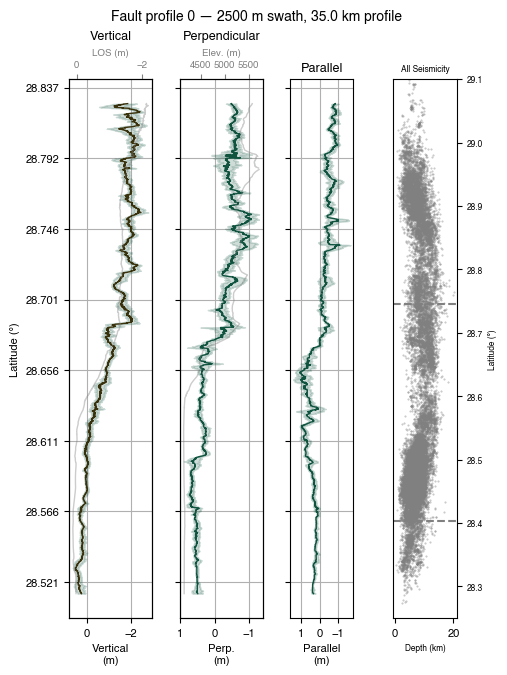

# Create and plot map with profiles along simple fault strike

In [ ]:
## MAKE PROFILES
rewrite = False

label = 'Tibet'

fault_map_path = '/Volumes/Tibet/XizangWVProcessing/GIS/Tibet_EQ_SimplifiedFaultTrace_v1 1/Tibet_EQ_SimplifiedFaultTrace.geojson'
folder = '/Volumes/Tibet/XizangWVProcessing/Profiles/'

print('saving profiles to: ',folder)
fault_map = gpd.read_file(fault_map_path) # complete representation of faulting to plot


profile_length = 20000 # in meters, not pixels
pixel_res = 1 # m
profile_width = 1000 # In meters 
profile_spacing = profile_width #in meters 
prefix = 'TibetSimpleTrace_20250107'#

swaths, swath_strikes, profiles, center_points, strikes, n_profs, azimuths = generateProfiles(fault_map_path,profile_length,profile_width,profile_spacing,save=rewrite,prefix=prefix,folder=folder)
## if get a warning about multipart geometries, use conda environment geospatial2
n_profs = np.sum(n_profs)
#strikes, n_profs
#print(len(n_profs),'exploded segments with',sum(n_profs),'total profiles')
print(len(swaths), 'total profiles')

In [ ]:
# CALC PROFILES AND PLOT WITH SEIS
profile_length = 20000#profile_length  # m
swath_width = 1000       # m
resolution = 10 #pixel_res       # m

# Read in the fault points
label = prefix


points = gpd.read_file('/Volumes/Tibet/XizangWVProcessing/Profiles/TibetSimpleTrace_20250107_centerpts_55profiles.geojson')

points = gpd.GeoDataFrame(points)

# Read the rasters
ns = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged1m.tif')
ew = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged1m.tif')
ud = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged1m.tif')
dem = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPost10m.tif')
los = rasterio.open('/Volumes/Tibet/XizangWVProcessing/SupportingData/ALOS_ZoeYin/A2_A301_F2-7_los_ll.tiff')
# Seismicity
depth_pts = pd.read_csv('/Volumes/Tibet/XizangWVProcessing/SupportingData/relocated_aftershocks_20250108-20250118.txt',sep='\s+',skiprows=2)
depth_pts['easting'], depth_pts['northing'] = P(depth_pts['longitude'],depth_pts['latitude'])

figpath = '/Volumes/Tibet/XizangWVProcessing/Profiles/pngs/'
savepath= '/Volumes/Tibet/XizangWVProcessing/Profiles/'

results_list = []  # We'll collect dictionaries here and build a DataFrame after the loop

for i in range(0,len(points)):
    print(i, 'of', len(points))

    lon, lat = P(points.geometry.x.iloc[i], points.geometry.y.iloc[i], inverse=True)
    lon1, lat1, _ = G.fwd(lon, lat, points.fault_azimuth.iloc[i] - 90, profile_length / 2)
    lon2, lat2, _ = G.fwd(lon, lat, points.fault_azimuth.iloc[i] + 90, profile_length / 2)
    tmppts = np.array(G.npts(lon1=lon1, lat1=lat1, lon2=lon2, lat2=lat2, npts=profile_length / resolution))

    starts = G.fwd(tmppts[:, 0], tmppts[:, 1], [points.fault_azimuth.iloc[i]] * len(tmppts), [swath_width / 2] * len(tmppts))
    ends = G.fwd(tmppts[:, 0], tmppts[:, 1], [points.fault_azimuth.iloc[i] + 180] * len(tmppts), [swath_width / 2] * len(tmppts))

    map_object = np.array(list(map(
        lambda lon1, lat1, lon2, lat2: G.npts(lon1, lat1, lon2, lat2, swath_width / resolution),
        starts[0], starts[1], ends[0], ends[1]
    )))

    pts = map_object.reshape(len(starts[0]) * int(swath_width / resolution), 2)
    pts = P(pts[:, 0], pts[:, 1])
    pts = np.column_stack(pts)
    dist = np.arange(-profile_length / 2, profile_length / 2, resolution)
    dists = np.repeat(dist, int(swath_width / resolution))

    utm_n = np.repeat(P(tmppts[:,0], tmppts[:,1])[1],int(swath_width / resolution))
    utm_e = np.repeat(P(tmppts[:,0], tmppts[:,1])[0],int(swath_width / resolution))

    # Northing and easting for x-label later
    if abs(np.sin(points.fault_azimuth.iloc[i]*np.pi/180)) >= np.sin(45*np.pi/180):
        # Use easting
        utm = np.repeat(P(tmppts[:,0], tmppts[:,1])[1],int(swath_width / resolution))
        xlabel= 'Northing'
    else: # use northing
        utm = np.repeat(P(tmppts[:,0], tmppts[:,1])[0],int(swath_width / resolution))
        xlabel= 'Easting'
    
    assert pts.shape[0] == dists.shape[0], "Mismatch between number of points and distances"

    ### seismicity
    # Create unit vectors
    az_rad = np.deg2rad(points.fault_azimuth.iloc[i])
    dx = np.cos(az_rad)
    dy = np.sin(az_rad)

    # Vectors from profile center
    rel_e = depth_pts.easting.values - points.geometry.x.iloc[i]
    rel_n = depth_pts.northing.values - points.geometry.y.iloc[i]
    
    # Project onto perpendicular axis (distance from centerline)
    along_dist = rel_e * dx + rel_n * dy
    perp_dist = -rel_e * dy + rel_n * dx
    
    # Filter seismicity points inside swath
    mask = (
        (np.abs(perp_dist) <= swath_width) & # grab seismicity within 2 swatch widths
        (np.abs(along_dist) <= profile_length / 2)
    )

    seis_swath = depth_pts[mask].copy()

    # Sample DEM at centerline
    elev_pts = P(tmppts[:, 0], tmppts[:, 1])  # convert to UTM
    elev_coords = np.column_stack(elev_pts)
    elev_samples = np.array([x for x in dem.sample(elev_coords)])
    elev_samples[elev_samples == -9999] = np.nan  # Handle NoData

    # Sample los at centerline
    los_samples = np.array([x for x in los.sample(elev_coords)])
    #los_samples[los_samples == -9999] = np.nan  # Handle NoData


    ### Sample rasters
    ns_samps = np.array([x for x in ns.sample(pts)])
    ns_samps[ns_samps == -9999] = np.nan
    ew_samps = np.array([x for x in ew.sample(pts)])
    ew_samps[ew_samps == -9999] = np.nan
    ud_samps = np.array([x for x in ud.sample(pts)])
    ud_samps[ud_samps == -9999] = np.nan

    par, perp = projectParPerp(
        ns_samps - np.nanmean(ns_samps),
        ew_samps - np.nanmean(ew_samps),
        points.fault_azimuth.iloc[i]
    )

    # Calculate medians at centerpoints of swath
    window = int(swath_width/resolution)
    min_periods = int(window/2)

    #    Apply to perp and vertical samples
    perp_medians, perp_mads = bin_and_median(np.array(perp), window)
    vert_medians, vert_mads = bin_and_median(np.array(ud_samps), window)
    utm_medians, _ = bin_and_median(np.array(utm),window)

    plt.figure(figsize=(7, 2.5))
    plt.style.use('seaborn-v0_8-colorblind')


    fig, (ax1, ax2, ax3) = plt.subplots(
        nrows=3, ncols=1, figsize=(7, 5), sharex=True,
        gridspec_kw={'hspace': 0}
    )
    plt.style.use('seaborn-v0_8-colorblind')

    # --- Plot VERTICAL (UD) ---
    ax1.plot(
        utm_medians,
        vert_medians,
        color="#39310B",
        linewidth=1,
        #label='Vertical Rolling Median',
        zorder=7
    )
    #ax1.fill_between(
    #    utm,
    #    (vert_rolling - vert_rolling_mad).values.flatten(),
    #    (vert_rolling + vert_rolling_mad).values.flatten(),
    #    color="#544710",
    #    alpha=0.2,
    #    label='±MAD'
    #)
    ax1.set_ylabel('Vertical\nDisplacement (m)', fontsize=8)
    ax1.tick_params(axis='x', labelbottom=False)
    #ax1.legend(fontsize=8, loc='lower left')
    ax1.set_title(f'Fault profile {i}, {swath_width} m swath width median disaplcement and seismicity', fontsize=8)
    ax1.grid(True)

    # Add elevation los second Y-axis
    ax1_elev = ax1.twinx()

    # Plot elevation behind as grey transparent fill
    ax1_elev.plot(
        utm_medians,
        los_samples,
        color='grey',
        linewidth=1,
        alpha=0.4,
        zorder=1,
        label='Elevation'
    )

    # Optionally reduce visual weight of elevation axis
    ax1_elev.tick_params(axis='y', labelsize=7, colors='grey')
    ax1_elev.set_ylabel("LOS (mm)", fontsize=7, color='grey')



    # --- Plot PERPENDICULAR ---
    ax2.plot(
        utm_medians,
        perp_medians,
        color="#105440",
        linewidth=1,
        label='Along Profile Rolling Median',
        zorder=7
    )
    #ax2.fill_between(
    #    utm,
    #    (perp_rolling - perp_rolling_mad).values.flatten(),
    #    (perp_rolling + perp_rolling_mad).values.flatten(),
    #    color="#105440",
    #    alpha=0.2,
    #    label='±MAD'
    #)
    ax2.set_ylabel('Along Profile\nDisplacement (m)', fontsize=10)
    ax2.set_xlabel(f'{xlabel} (m)', fontsize=8)
    #ax2.legend(fontsize=8, loc='lower left')
    ax2.grid(True)

    # Add elevation on second Y-axis
    ax2_elev = ax2.twinx()

    # Plot elevation behind as grey transparent fill
    ax2_elev.plot(
        utm_medians,
        elev_samples,
        color='grey',
        linewidth=1,
        alpha=0.4,
        zorder=1,
        label='Elevation'
    )

    # Optionally reduce visual weight of elevation axis
    ax2_elev.tick_params(axis='y', labelsize=7, colors='grey')
    ax2_elev.set_ylabel("Elevation (m)", fontsize=7, color='grey')

    # Plot image boundaries: 
    if xlabel == 'Easting':
        ax1.axvline(548547.496,linestyle=':',c='grey',zorder=1)
        ax2.axvline(548547.496,linestyle=':',c='grey',zorder=1)
        ax1.axvline(543379.578,linestyle=':',c='grey',zorder=1)
        ax2.axvline(543379.578,linestyle=':',c='grey',zorder=1)

        seisx = seis_swath.easting
    else:
        seisx = seis_swath.northing

    # --- Plot DEPTH CROSS SECTION ---
    ax3.scatter(
        seisx,
        seis_swath.depth,
        s=2, color='darkred', alpha=0.6
    )
    ax3.invert_yaxis()  # depth increases down
    ax3.set_ylabel("Depth (km)", fontsize=8)
    ax3.set_xlabel(f"{xlabel} (m)", fontsize=8)
    #ax3.set_title("Depth Cross Section (Seismicity)", fontsize=9)
    ax3.grid(True)

    # Optional offset annotation (same as your original)
    offset_text = ""
    ax1.text(0.98, 0.95, offset_text.strip(),
             fontsize=8, ha='right', va='top',
             transform=ax1.transAxes,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    fig.align_ylabels([ax1, ax2, ax3])
    plt.savefig(f'{figpath}Profile{i}_{len(points)}_ProfLen{profile_length}_SwathWidth{swath_width}_{label}.svg', dpi=300)
    plt.show()

    # Trim arrays to same length (in case of rounding errors)
    n_bins = len(perp_medians)
    results_df = pd.DataFrame({
        'profile_id': [i] * n_bins,
        'easting': utm_e[::window][:n_bins],
        'northing': utm_n[::window][:n_bins],
        'prof_dist': dist,
        'par_median': par_medians,
        'par_mad': par_mads,
        'perp_median': perp_medians,
        'perp_mad': perp_mads,
        'vert_median': vert_medians,
        'vert_mad': vert_mads,
        'los_median':los_medians,
        'los_mad':los_mads
    })

    # Append to a master DataFrame
    if i == 0:
        all_profiles_df = results_df.copy()
    else:
        all_profiles_df = pd.concat([all_profiles_df, results_df], ignore_index=True)

all_profiles_df.to_csv(
    f'{savepath}ProfileRollingStats_ProfLen{profile_length}_SwathWidth{swath_width}_{label}.csv',
    index=False

/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_39042/1862009450.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('terrain', len(profile_ids)+4)
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_39042/1862009450.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  map_ax.set_xticklabels([f"{lon:.3f}" for lon in xticks_lon])
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_39042/1862009450.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  map_ax.set_yticklabels([f"{lat:.3f}" for lat in yticks_lat])


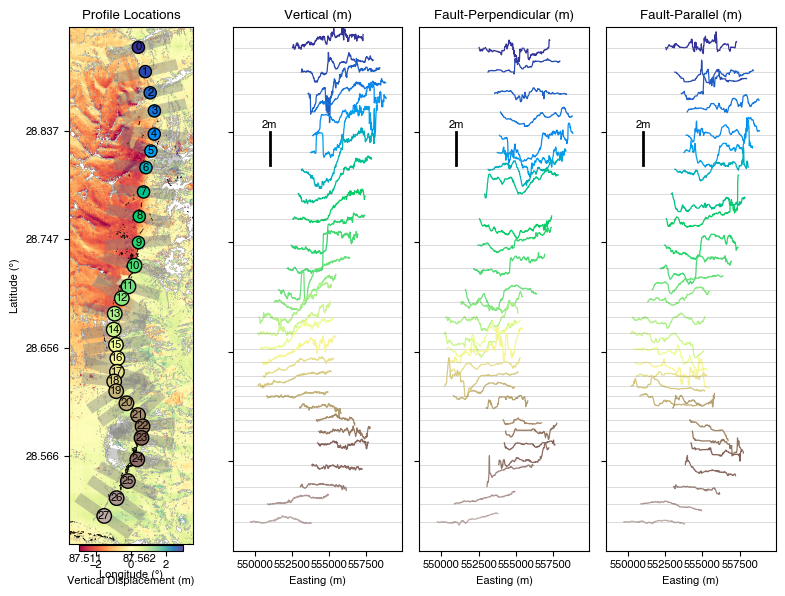

In [ ]:
# PLOT MAP AND PROFILES
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import geopandas as gpd
import rasterio
from rasterio.plot import show as rioshow

file = '/Volumes/Tibet/XizangWVProcessing/Profiles/ProfileRollingStats_ProfLen20000_SwathWidth1000_TibetSimpleTrace_20250107.csv'
results_df = pd.read_csv(file)

# Load profile lines from GeoJSON
profiles_gdf = gpd.read_file("/Volumes/Tibet/XizangWVProcessing/Profiles/TibetSimpleTrace_20250107_swaths_55profiles.geojson")[::2]  
centers_gdf = gpd.read_file('/Volumes/Tibet/XizangWVProcessing/Profiles/TibetSimpleTrace_20250107_centerpts_55profiles.geojson')[::2]
tmpdf = results_df.iloc[::2]
# Open raster for background
raster_path = "/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged50m.tif" 
raster = rasterio.open(raster_path)

# Extract unique profile IDs
profile_ids = centers_gdf.index

# Set up figure: 1 row, 5 columns (Map + 4 vertical subplots)
fig, axes = plt.subplots(
    nrows=1, ncols=4, figsize=(8, 6),
    #gridspec_kw={'width_ratios': [2, 0.7, 0.7, 0.7]}
)
map_ax, vert_ax, perp_ax, par_ax, = axes

# -------------------- MAP PLOT --------------------
# Plot raster background
rioshow(raster, ax=map_ax,cmap='Spectral',vmin=-3,vmax=3)
norm = mcolors.Normalize(vmin=-3, vmax=3)
sm = plt.cm.ScalarMappable(cmap='Spectral', norm=norm)
sm.set_array([])  # Only needed for compatibility

cbar = fig.colorbar(sm, ax=map_ax, fraction=0.01,pad=0.002,location='bottom')
cbar.set_label("Vertical Displacement (m)")

# Colormap for profiles
cmap = cm.get_cmap('terrain', len(profile_ids)+4)
colors = {pid: cmap(i) for i, pid in enumerate(profile_ids)}


# Plot GeoJSON profile lines 
profiles_gdf.plot(ax=map_ax, color='grey', linewidth=1, alpha = 0.4) 
for i, gdf in enumerate(centers_gdf.iterrows()):
     _, row = gdf 
     point = row.geometry 
     map_ax.text(point.x, point.y, str(i), fontsize=8, 
                 ha='center', va='center', color='black',#('white' if i < 11 else 'black'),
                   bbox=dict(boxstyle="circle,pad=0.1", # "circle" boxstyle with padding 
                             fc=colors.get(row.name, 'black'), # Face color of the circle 
                             ec=None)) # Line width of the circle )


shapefile_path = '/Volumes/Tibet/XizangWVProcessing/GIS/Xizang_Mapping_31Mar2025_ALL/Xizang_Mapping_31Mar2025_ALL.geojson'
shpdf = gpd.read_file(shapefile_path)
shpdf.plot(ax=map_ax, edgecolor='black',linewidth=0.6)    

map_ax.set_title("Profile Locations")
map_ax.set_xlabel("Easting")
map_ax.set_ylabel("Northing")

# Get bounds from profile geometries
xmin, ymin, xmax, ymax = profiles_gdf.total_bounds
buffer = 500  # Optional: add a buffer around the bounds for better visibility
# Apply bounds to map axis
map_ax.set_xlim(xmin - buffer, xmax + buffer)
map_ax.set_ylim(ymin - buffer, ymax + buffer)

# --- Convert axis ticks to lon/lat labels ---
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:32645", "EPSG:4326", always_xy=True)

# Get current ticks in projected coordinates
xticks = map_ax.get_xticks()
yticks = map_ax.get_yticks()

# Convert to lon/lat
xticks_lon, _ = transformer.transform(xticks, np.full_like(xticks, yticks[0]))
_, yticks_lat = transformer.transform(np.full_like(yticks, xticks[0]), yticks)

# Set formatted tick labels
map_ax.set_xticklabels([f"{lon:.3f}" for lon in xticks_lon])
map_ax.set_yticklabels([f"{lat:.3f}" for lat in yticks_lat])

# Update labels
map_ax.set_xlabel("Longitude (°)")
map_ax.set_ylabel("Latitude (°)")


# -------------------- DISPLACEMENT PROFILES --------------------
for idx, pid in enumerate(profile_ids):
    prof = tmpdf[(tmpdf.profile_id == pid)]
    prof = prof[(np.absolute(prof.prof_dist) < 2500)]

    if pid >= 39 and pid <= 50: 
        prof = prof[prof.prof_dist < 1000]

    base_northing = prof[prof.prof_dist == 0].northing.values[0] if not prof[prof.prof_dist == 0].empty else 0
    shift = base_northing
    color = colors[pid]

    # Scale multiplier for vert on profiles
    sc = 1500

    # Vert
    vert_ax.plot(
        prof.easting,
        (prof.vert_median - prof.vert_median.iloc[-1]) * sc + shift, linewidth=0.9,color=color,
    )
    vert_ax.axhline(shift, color='gray', linewidth=0.5, alpha=0.4)

    # Perp
    perp_ax.plot(
        prof.easting,
        (prof.perp_median - prof.perp_median.iloc[-1]) * sc + shift, linewidth=0.9,color=color,
    )
    perp_ax.axhline(shift, color='gray', linewidth=0.5, alpha=0.4)

    # Par
    par_ax.plot(
        prof.easting,
        (prof.par_median - prof.par_median.iloc[-1]) * sc + shift, linewidth=0.9,color=color,
    )
    par_ax.axhline(shift, color='gray', linewidth=0.5, alpha=0.4)

# SCALE BAR
par_ax.plot([551000, 551000], [3190000-2*sc, 3190000], color='black', linewidth=2)
par_ax.text(551000,3190600,s='2m',ha='center',va='center')
perp_ax.plot([551000, 551000], [3190000-2*sc, 3190000], color='black', linewidth=2)
perp_ax.text(551000,3190600,s='2m',ha='center',va='center')
vert_ax.plot([551000, 551000], [3190000-2*sc, 3190000], color='black', linewidth=2)
vert_ax.text(551000,3190600,s='2m',ha='center',va='center')

# -------------------- LABELING AND BOUNDS --------------------
vert_ax.set_title("Vertical (m)")
perp_ax.set_title("Fault-Perpendicular (m)")
par_ax.set_title("Fault-Parallel (m)")
perp_ax.set_xlim(map_ax.get_xbound())
vert_ax.set_xlim(map_ax.get_xbound())
par_ax.set_xlim(map_ax.get_xbound())
perp_ax.set_ylim(map_ax.get_ybound())
vert_ax.set_ylim(map_ax.get_ybound())
par_ax.set_ylim(map_ax.get_ybound())

for ax in [vert_ax, perp_ax, par_ax]:
    ax.set_xlabel("Easting (m)")
    ax.set_yticklabels([])  # Hide y-axis labels to reduce clutter

map_ax.set_aspect('equal')
plt.rcParams.update({'font.size': 8,'font.family':'Helvetica'})
plt.tight_layout()
plt.savefig('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/TibetJan2025/Figures/MapProfiles.svg')
plt.show()


In [24]:
39/2

19.5

## Save downsampled displacements

In [7]:
%%bash 
gdalwarp -t_srs EPSG:32645 -te 532947.5 3151047.5 561093.5 3201094 -tr 10 10 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged1m.tif  \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged100m.tif

Creating output file that is 2815P x 5005L.
Processing /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged1m.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [2]:
%%bash 
gdalwarp -t_srs EPSG:32645 -te 532947.5 3151047.5 561093.5 3201094 -tr 500 500 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged1m.tif  \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged500m.tif
gdalwarp -t_srs EPSG:32645 -te 532947.5 3151047.5 561093.5 3201094 -tr 500 500 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged1m.tif  \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged-deramped500m.tif
gdalwarp -t_srs EPSG:32645 -te 532947.5 3151047.5 561093.5 3201094 -tr 500 500 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged1m.tif  \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged500m.tif


Creating output file that is 56P x 100L.
Processing /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged1m.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 56P x 100L.
Processing /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged1m.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 56P x 100L.
Processing /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged1m.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
%%bash 
gdalwarp -t_srs EPSG:32645 -te 532947.5 3151047.5 561093.5 3201094 -tr 50 50 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged1m.tif  \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged50m.tif
gdalwarp -t_srs EPSG:32645 -te 532947.5 3151047.5 561093.5 3201094 -tr 50 50 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged1m.tif  \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged50m.tif
gdalwarp -t_srs EPSG:32645 -te 532947.5 3151047.5 561093.5 3201094 -tr 50 50 -srcnodata -9999 -dstnodata -9999 -overwrite -ot Float32 -of GTiff -co COMPRESS=LZW -co ZLEVEL=9 -co BIGTIFF=YES \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged1m.tif  \
    /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged50m.tif

Creating output file that is 563P x 1001L.
Processing /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged1m.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 563P x 1001L.
Processing /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged1m.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 563P x 1001L.
Processing /Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged1m.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
ns_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged-deramped500m.tif'
ew_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged500m.tif'
ud_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged500m.tif'

df = pd.DataFrame()

for file in[ns_path,ew_path,ud_path]:
    with rasterio.open(file) as src:
        band1 = src.read(1)
        if file is ns_path:
            print('Band1 has shape', band1.shape)
            height, width = band1.shape

            # Generate row/col indices
            rows, cols = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')

            # Get center coordinates of each pixel
            xs, ys = rasterio.transform.xy(src.transform, rows, cols, offset='center')

            # Convert lists to arrays and reshape
            lons = np.array(xs).reshape(band1.shape)
            lats = np.array(ys).reshape(band1.shape)

            print('lons shape', lons.shape)
            print('lats shape', lats.shape)
            assert lons.shape == band1.shape

            df['northing'] = lats.flatten()
            df['easting'] = lons.flatten()
            df['dNS'] = band1.flatten()
        elif file is ew_path:
            df['dEW'] = band1.flatten()
        elif file is ud_path:
            df['dUD'] = band1.flatten()
            
df.to_csv('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/Tibet500mDisplacements.csv',index=False)

# Map with vectors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio.transform import xy
import os
import geopandas as gpd

from pyproj import Transformer

In [56]:
# --- Input files ---
ns_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged500m.tif'
ew_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged500m.tif'
ud_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged10m.tif'

seis = pd.read_csv('/Volumes/Tibet/XizangWVProcessing/SupportingData/relocated_aftershocks_20250108-20250118_epsg32645.txt',sep=',')

shapefile_path = '/Volumes/Tibet/XizangWVProcessing/SupportingData/PreexistingLineaments_27June2025/Lineaments.geojson'  # or .geojson

# --- Parameters ---
sample_step = 2  # pixels between arrows
nodata_value = -9999  # adjust if needed
scale = 900.0  # arrow scaling factor

# --- Define bounding box for normalization (edit these!) ---
xmin, xmax = 558774, 560289 # Easting bounds (m)
ymin, ymax = 3151721, 3200000  # Northing bounds (m)

# --- Bounding box for plotting (UTM zone 45N) ---
plot_xmin, plot_xmax = 532947.5, 561093.5
plot_ymin, plot_ymax = 3151047.5, 3201094

# --- Open raster files ---
with rasterio.open(ns_path) as ns_src, rasterio.open(ew_path) as ew_src:
    assert ns_src.shape == ew_src.shape, "NS and EW rasters must match in shape"
    ns = ns_src.read(1)
    ew = ew_src.read(1)
    transform = ns_src.transform

    # --- Sample grid points ---
    rows = np.arange(0, ns.shape[0], sample_step)
    cols = np.arange(0, ns.shape[1], sample_step)
    X, Y, U, V = [], [], [], []

    for row in rows:
        for col in cols:
            ns_val = ns[row, col]
            ew_val = ew[row, col]

            # Skip NoData values
            if ns_val == nodata_value or ew_val == nodata_value:
                continue

            x, y = xy(transform, row, col)
            X.append(x)
            Y.append(y)
            U.append(ew_val * scale)
            V.append(ns_val * scale)

# --- Compute mean U and V within the bounding box ---
U = np.array(U)
V = np.array(V)
X = np.array(X)
Y = np.array(Y)

# Mask vectors inside bounding box
mask = (X >= xmin) & (X <= xmax) & (Y >= ymin) & (Y <= ymax)
if np.any(mask):
    U_offset = np.nanmean(U[mask])
    V_offset = np.nanmean(V[mask])
else:
    raise ValueError("No vectors found in the specified normalization box.")

# Normalize all vectors
U -= U_offset
V -= V_offset


# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 10))

# Optional: show a background map (e.g., NS or DEM)
with rasterio.open(ud_path) as src:
    img = show(src, ax=ax, cmap='Blues_r', alpha=0.9,vmin=-1.75, vmax=1.75)
    # Create colorbar
    cbar = plt.colorbar(img.get_images()[0], ax=ax, orientation='horizontal', pad=0.05,shrink=0.3)
    cbar.set_label('Vertical Displacement (m)')

    # set bounds
    bounds = src.bounds  # left, bottom, right, top

    # Set axis limits from raster bounds
    ax.set_xlim(bounds.left, bounds.right)
    ax.set_ylim(bounds.bottom, bounds.top)

# pre lineaments
gdf = gpd.read_file(shapefile_path)
gdf.plot(ax=ax, edgecolor='red',linewidth=1)    

# Plot seismicity
ax.scatter(seis.lon,seis.lat,c='maroon',s=0.2)
# Plot vectors
q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='black', width=0.003)

# Add transparent box for normalization area
import matplotlib.patches as patches
from matplotlib.lines import Line2D

norm_box = patches.Rectangle(
    (xmin, ymin), xmax - xmin, ymax - ymin,
    linewidth=1.5,
    edgecolor='black',
    facecolor='gray',
    alpha=0.25,
    linestyle='--',
    label='Normalization Area'
)
ax.add_patch(norm_box)

# Add scale arrow manually
scale_length = 0.5  # meters
scale_x = ax.get_xlim()[0] + 500  # adjust offset
scale_y = ax.get_ylim()[0] + 500

# Plot scale arrow
ax.quiver(scale_x, scale_y, scale_length * scale, 0, angles='xy', scale_units='xy',
          scale=1, color='black', width=0.003, zorder=5)

# Add to legend
arrow_legend = Line2D([0], [0], color='black', lw=1.2, label=f'{scale_length} m')

# Add normalization box to legend if not already
handles, labels = ax.get_legend_handles_labels()
handles.append(arrow_legend)
labels.append(f'{scale_length} m horiz. displ.')

ax.legend(handles, labels, loc='upper left', fontsize=9)

# --- Convert axis ticks to lon/lat labels ---
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:32645", "EPSG:4326", always_xy=True)

# Get current ticks in projected coordinates
xticks = ax.get_xticks()
yticks = ax.get_yticks()

# Convert to lon/lat
xticks_lon, _ = transformer.transform(xticks, np.full_like(xticks, yticks[0]))
_, yticks_lat = transformer.transform(np.full_like(yticks, xticks[0]), yticks)

# Set formatted tick labels
ax.set_xticklabels([f"{lon:.3f}" for lon in xticks_lon])
ax.set_yticklabels([f"{lat:.3f}" for lat in yticks_lat])

# Update labels
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")

# Set plot limits
ax.set_xlim(plot_xmin,plot_xmax)
ax.set_ylim(plot_ymin,plot_ymax)

ax.set_title("Horizontal Displacement Vectors")
ax.set_aspect('equal')
plt.rcParams.update({'font.size': 9})
plt.tight_layout()
plt.show()

NameError: name 'xy' is not defined

In [ ]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.transform import xy
from pyproj import Transformer
import pygmt
import geopandas as gpd

# --- File Paths ---
ns_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged500m.tif'
ew_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged500m.tif'
ud_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged50m.tif'
shapefile_path = '/Volumes/Tibet/XizangWVProcessing/GIS/Xizang_Mapping_31Mar2025_ALL/Xizang_Mapping_31Mar2025_ALLepsg4326.shp'
seis = pd.read_csv('/Volumes/Tibet/XizangWVProcessing/SupportingData/relocated_aftershocks_20250108-20250118_epsg32645.txt',sep=',')

savef = f'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/TibetJan2025/Figures/VectorDisplacement_map.pdf'


# --- Parameters ---
sample_step = 2
nodata_value = -9999
scale = 0.4
plot_region = optical_region

# --- Define bounding box for normalization (edit these!) ---
xmin, xmax = 87.6005, 87.6185 
ymin, ymax = 28.4908, 28.9265

# --- Sample vectors from rasters ---
with rasterio.open(ns_path) as ns_src, rasterio.open(ew_path) as ew_src:
    ns = ns_src.read(1)
    ew = ew_src.read(1)
    transform = ns_src.transform
    rows = np.arange(0, ns.shape[0], sample_step)
    cols = np.arange(0, ns.shape[1], sample_step)
    X, Y, U, V = [], [], [], []

    for row in rows:
        for col in cols:
            ns_val = ns[row, col]
            ew_val = ew[row, col]
            if ns_val == nodata_value or ew_val == nodata_value:
                continue
            x, y = xy(transform, row, col)
            X.append(x)
            Y.append(y)
            U.append(ew_val * scale)
            V.append(ns_val * scale)

X = np.array(X)
Y = np.array(Y)
U = np.array(U)
V = np.array(V)


# Initialize transformer from UTM zone 45N to WGS84
transformer = Transformer.from_crs("EPSG:32645", "EPSG:4326", always_xy=True)

# Convert all X, Y (UTM) to lon, lat
lon, lat = transformer.transform(X, Y)

# Normalize horizontal vectors within a box
mask = (lon >= xmin) & (lon <= xmax) & (lat >= ymin) & (lat <= ymax)
U -= np.nanmean(U[mask])
V -= np.nanmean(V[mask])

# --- Prepare data for PyGMT ---
vec_data = pd.DataFrame({
    "lon": lon,
    "lat": lat,
    "azimuth": (np.degrees(np.arctan2(V,U)) + 360) % 360,
    "length": np.hypot(U, V)
})

# --- Plot with PyGMT ---
fig = pygmt.Figure()

# Configuration for the 'current figure'.
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="ddd.xx")
pygmt.config(FONT_ANNOT="8p,Helvetica,black")

fig.basemap(region=plot_region, projection="M10c", frame=["WNse", "af"])

# Colormap
im = rioxarray.open_rasterio(ud_path)
im = im.rio.reproject("EPSG:4326")
pygmt.makecpt(cmap="roma", series=[-3, 3])
fig.grdimage(grid=im)
fig.colorbar(frame=["a1f1", "x+lDisplacement", "y+lm"])

# Plot seismicity
#seis['slon'], seis['slat'] = transformer.transform(seis['lon'], seis['lat'])
#fig.plot(x=seis['slon'], y=seis['slat'], style='c0.01c', pen="thin,maroon")

# Faults
fig.plot(data='/Volumes/Tibet/XizangWVProcessing/GIS/Xizang_Mapping_31Mar2025_ALL/Xizang_Mapping_31Mar2025_ALLepsg4326.shp', pen="0.5p,red")
# Swath
fig.plot(data='/Volumes/Tibet/XizangWVProcessing/Profiles/TibetProfilesTargeted_20250107_swaths_1profiles.shp', pen="0.6p,maroon",fill="maroon", transparency=60)

# Plot horizontal displacement vectors
fig.plot(
    x=vec_data.lon,
    y=vec_data.lat,
    style='v0.2c+e',
    direction=[vec_data.azimuth, vec_data.length],
    pen="1p,black"
)

# Scale arrow
# Plot horizontal displacement vectors
fig.plot(
    x=87.4,
    y=28.55,
    style='v0.5c+e',
    direction=[0, 2*scale],
    pen="3p,black"
)

# Plot a rectangle of the region
rectangle = [[xmin,ymin,xmax,ymax]]
fig.plot(data=rectangle, style="r+s", pen="0.6p,darkgrey",fill="lightgrey",transparency=40)

# Scale Bar
fig.basemap(map_scale='JBL+w10k+o-4c/-1c+lkm',box="+c0.1/0.3+gwhite@30+p0.5p,grey@30,solid")




fig.savefig(savef,dpi=300)

# Export or show
fig.show()

# Overview Figure 1

In [1]:
import pygmt
import rioxarray
from pyproj import Proj, Geod
P = Proj('epsg:32645')
G = Geod(ellps='WGS84')
#532947.5 3151094 560947.5 3201094

In [2]:
# Bounding box
coords = P([532947.5,560947.5], [3151094,3201094],inverse=True)
optical_region = [coords[0][0],coords[0][1], coords[1][0],coords[1][1]]
overview_region = [75,100,25,40]



grid = pygmt.datasets.load_earth_relief(
    resolution='01m',
    region=overview_region,
    use_srtm=True)

dgrid = pygmt.grdgradient(grid=grid, radiance=[315, 60])

P = Proj('epsg:32645')
G = Geod(ellps='WGS84')

In [6]:
P(87.449,28.486061808)

(543947.3830029559, 3151129.9683884545)

In [147]:
import pandas as pd
import numpy as np

<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_48731/563651724.py:27: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('https://geodesy.unr.edu/GSRM/vel-at-GPS_EU.gmt',sep='\s+',header=None)
/var/folders/zn/w54gt7k11csfs1n4z8r3xccsyqhmjz/T/ipykernel_48731/563651724.py:45: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(f,sep='\s+',skiprows=1,header=None)
ERROR 1: Features without geometry not supported by GMT writer.
ERROR 1: Features without geometry not supported by GMT writer.
ERROR 1: Features without geometry not supported by GMT writer.


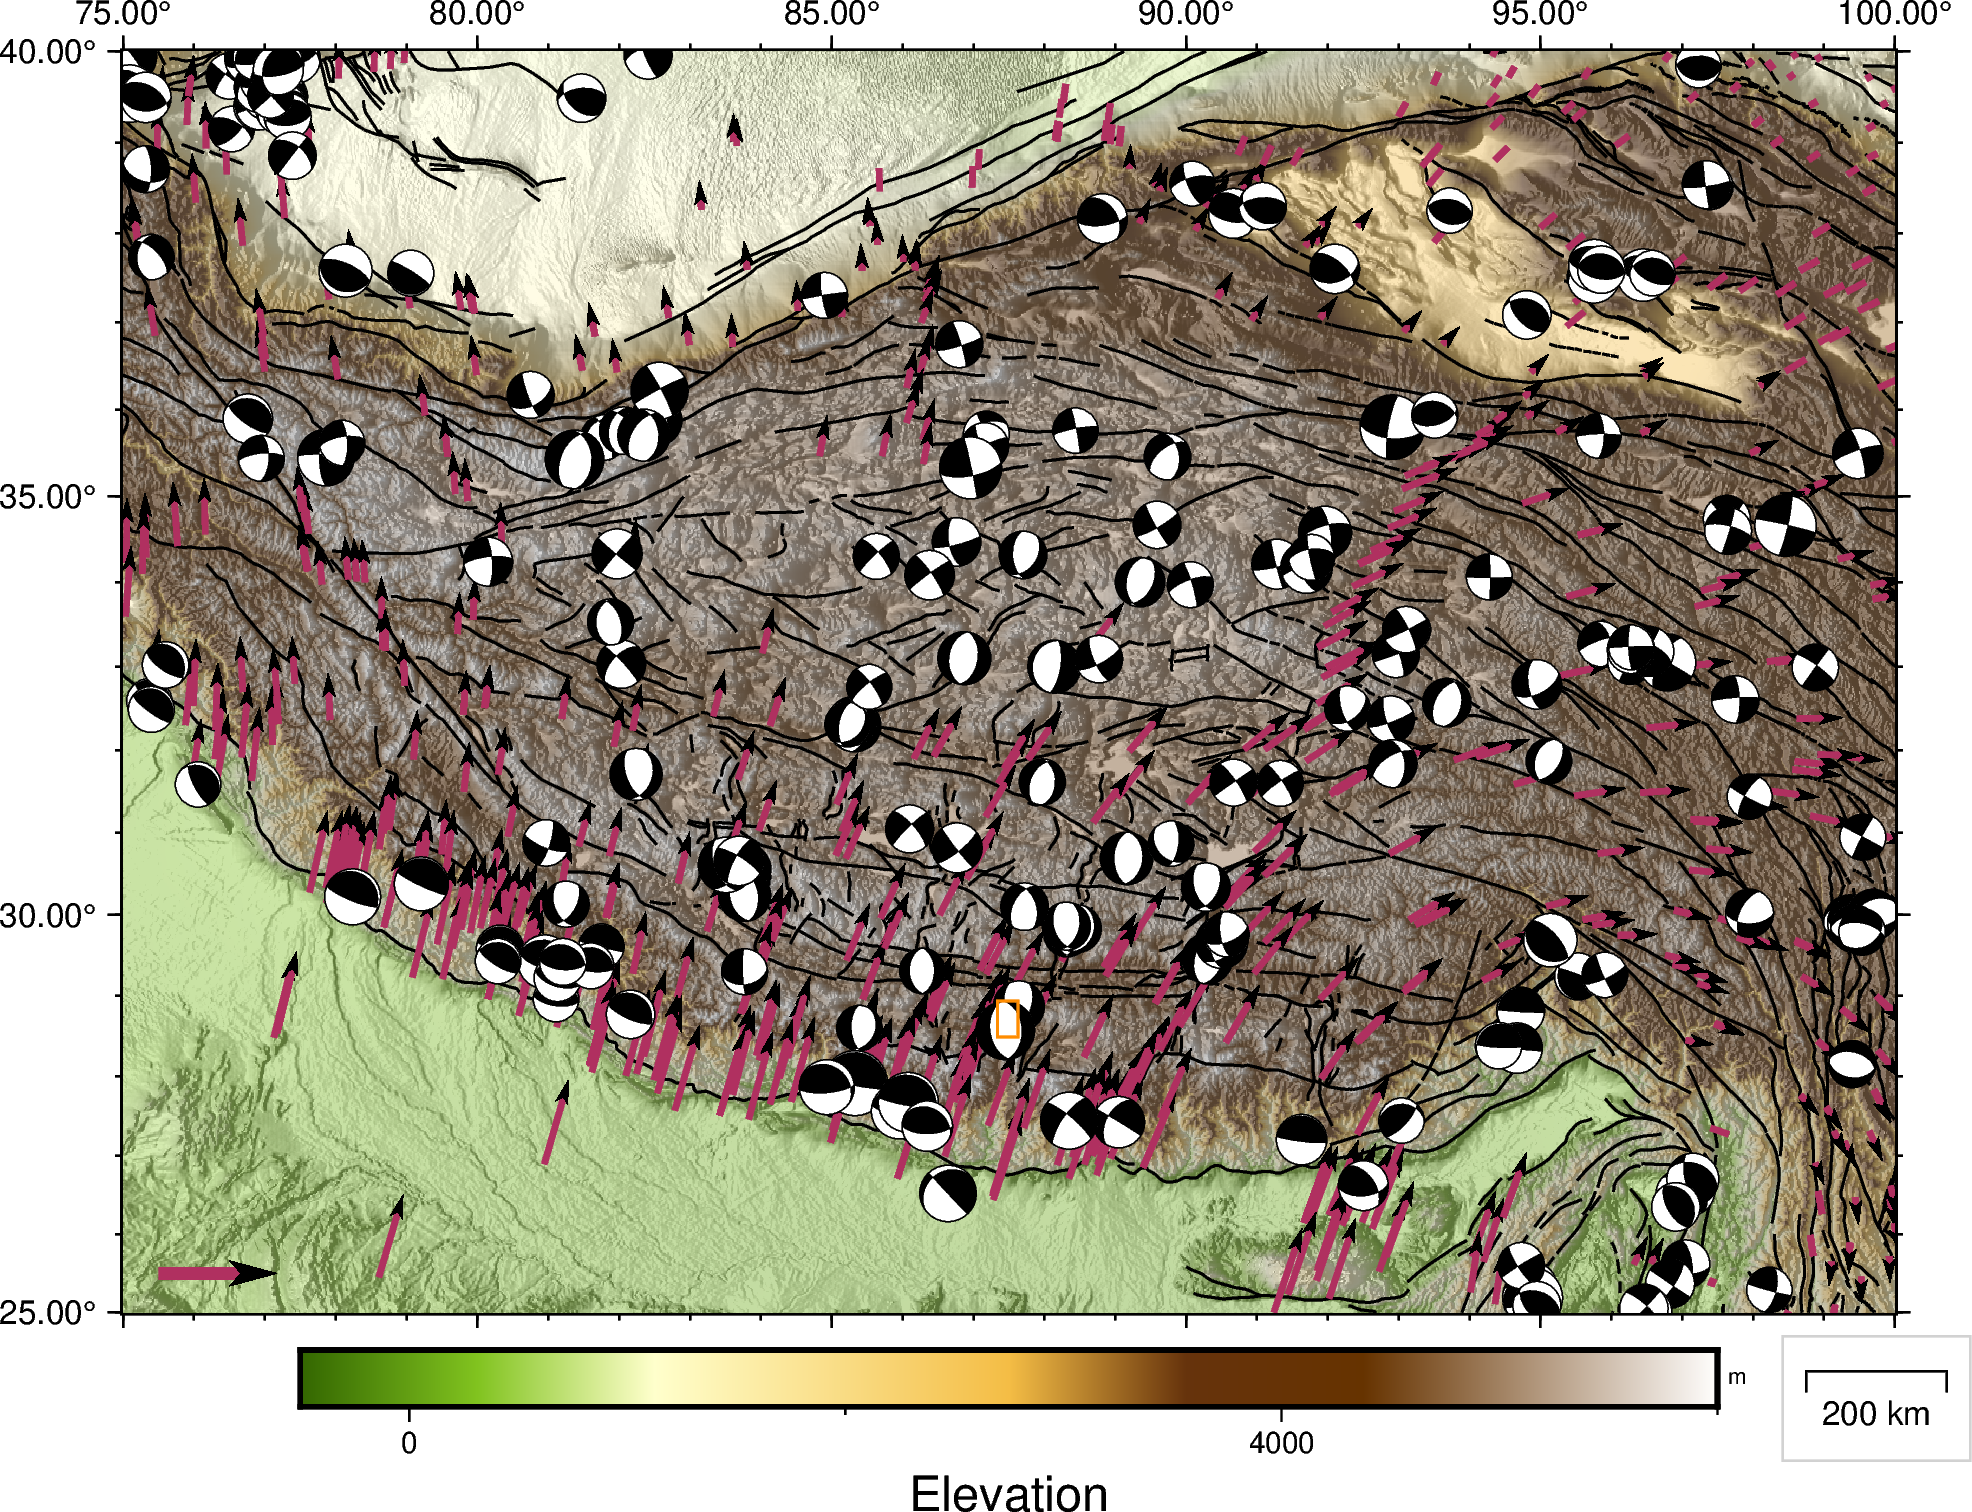

In [ ]:
# Introductory figure base
fig = pygmt.Figure()

# Configuration for the 'current figure'.
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="ddd.xx")
pygmt.config(FONT_ANNOT_PRIMARY="8p")
pygmt.config(FONT_ANNOT_SECONDARY="6p")

# Plot the base map of the main figure. 
fig.basemap(region=overview_region, projection="M15c", frame=["WNse", "af"])

# Hillshade
pygmt.makecpt(cmap="dem1", series=[-500, 6000])
fig.grdimage(grid=grid)
fig.colorbar(frame=["a4000f2000", "x+lElevation", "y+lm"])

# Hillshade
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 30])
pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
fig.grdimage(grid=dgrid,cmap=True,transparency=40)

# Faults
fig.plot(data='/Volumes/Tibet/XizangWVProcessing/SupportingData/CAFD400_v2023/CAFD400_V2023_1.shp', pen="0.6p,black")

# Velocity Vectotrs
df = pd.read_csv('https://geodesy.unr.edu/GSRM/vel-at-GPS_EU.gmt',sep='\s+',header=None)

fig.velo(data=df,
    spec='e0.02/0.39+f0',         # Scale arrow and format
    pen="1.5p,maroon",               # Outline pen
    line=True,
    vector="0.2c+p1p+e+gblack"      # Arrowhead styling
)
# Scale arrow
fig.velo(data=pd.DataFrame({'0':75.5,	'1':25.5,	'2':50,	'3':0,	'4':0,	'5':0,	'6':0,	'7':'eh'},index=['0']),
    spec='e0.02/0.39+f0',
    pen="3p,maroon",               # Outline pen
    line=True,
    vector="0.4c+p1p+e+gblack"      # Arrowhead styling
)

# Focal mechanisms
f = '/Volumes/Tibet/XizangWVProcessing/SupportingData/GCMTTibetFMsTo20250107.txt'
df = pd.read_csv(f,sep='\s+',skiprows=1,header=None)
df.columns = ['lon', 'lat', 'strike1', 'dip1', 'rake1', 'strike2', 'dip2', 'rake2','mantissa', 'exponent', 'name']
fig.meca(spec=df[['strike1', 'dip1', 'rake1', 'strike2', 'dip2', 'rake2','mantissa', 'exponent']],
            longitude=df.lon,latitude=df.lat,depth=np.zeros(len(df)),
            scale=f'0.35c',convention="gcmt")

# Plot a rectangle of the region
rectangle = [[optical_region[0], optical_region[2], optical_region[1], optical_region[3]]]
fig.plot(data=rectangle, style="r+s", pen="0.6p,darkorange")

# Scale Bar
fig.basemap(map_scale='JBR+w200k+o-0.75c/0.5c+lkm',box="+c0.1/0.3+gwhite@30+p0.5p,grey@30,solid")

fig.savefig('/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/TibetJan2025/Figures/TingriEQIntroMapStarter-r.pdf',dpi=300)

fig.show()


In [74]:
ns

array([[ 1.5000001e-01, -1.2500000e+00,  2.0000000e-01, ...,
        -7.5000000e-01, -1.1500000e+00, -0.0000000e+00],
       [ 4.0000001e-01, -4.5000002e-01, -2.5000000e-01, ...,
        -3.0000001e-01, -1.5000001e-01, -2.5000000e-02],
       [ 3.4999999e-01,  5.5000001e-01,  4.5000002e-01, ...,
        -1.2750000e+00, -2.0000000e-01, -9.9990000e+03],
       ...,
       [ 5.0000001e-02, -9.9990000e+03, -7.5000000e-01, ...,
        -3.4999999e-01, -2.5000000e-01, -3.4999999e-01],
       [-3.4999999e-01, -4.5000002e-01, -3.4999999e-01, ...,
        -3.2500002e-01, -3.0000001e-01, -1.5000001e-01],
       [-5.5000001e-01, -5.5000001e-01, -3.4999999e-01, ...,
         2.5000000e-01, -2.7500001e-01, -2.0000000e-01]],
      shape=(100, 56), dtype=float32)

In [58]:
seis

id            lon           lat    depth                     dt
0        628  547448.279046  3.202787e+06 -10624.0   2025-1-8T14:51:40.83
1        629  550818.546621  3.199399e+06 -10713.0   2025-1-8T14:52:47.82
2        632  552640.995828  3.199868e+06  -9330.0   2025-1-8T14:57:44.59
3        635  546712.609480  3.185039e+06 -16034.0    2025-1-8T15:4:14.42
4        637  547998.802366  3.197785e+06 -11309.0   2025-1-8T15:12:29.41
...      ...            ...           ...      ...                    ...
25267  31033  546671.397391  3.192704e+06  -7488.0  2025-1-18T15:32:21.15
25268  31034  549605.062181  3.163798e+06 -12226.0  2025-1-18T15:35:24.71
25269  31036  547220.466472  3.206326e+06  -5433.0  2025-1-18T15:45:44.33
25270  31037  546185.504197  3.201873e+06  -7194.0   2025-1-18T15:53:36.3
25271  31038  550106.195802  3.195010e+06 -11512.0  2025-1-18T16:17:11.23

[25272 rows x 5 columns]

# Displacement Results Maps

In [ ]:
direct = 'UD'
im = rioxarray.open_rasterio(f'/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/{direct}_displacement_merged50m.tif')
im = im.rio.reproject("EPSG:4326")

savef = f'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/TibetJan2025/Figures/{direct}_map.pdf'

# Introductory figure base
fig = pygmt.Figure()

# Configuration for the 'current figure'.
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="ddd.xx")
pygmt.config(FONT_ANNOT="8p,Helvetica,black")

# Plot the base map of the main figure. 
fig.basemap(region=optical_region, projection="M6c", frame=["WNse", "af"])

# Colormap
pygmt.makecpt(cmap="roma", series=[-3, 3])
fig.grdimage(grid=im)
fig.colorbar(frame=["a1f1", "x+lDisplacement", "y+lm"])

# Faults
fig.plot(data='/Volumes/Tibet/XizangWVProcessing/GIS/Xizang_Mapping_31Mar2025_ALL/Xizang_Mapping_31Mar2025_ALLepsg4326.shp', pen="0.4p,black")

# Scale Bar
fig.basemap(map_scale='JBL+w10k+o-2.5c/-1c+lkm',box="+c0.1/0.3+gwhite@30+p0.5p,grey@30,solid")

fig.savefig(savef,dpi=300)

fig.show()

/Users/chanagan/miniforge3/envs/image_processing/lib/python3.13/site-packages/pygmt/src/grdimage.py:169: RuntimeWarning: Input image has dtype: float32 which is unsupported, and may result in an incorrect output. Please recast image to a uint8 dtype and/or scale to 0-255 range, e.g. using a histogram equalization function like skimage.exposure.equalize_hist.
  lib.virtualfile_in(check_kind="raster", data=grid) as vingrd,


/Users/chanagan/miniforge3/envs/image_processing/lib/python3.13/site-packages/pygmt/src/grdimage.py:169: RuntimeWarning: Input image has dtype: float32 which is unsupported, and may result in an incorrect output. Please recast image to a uint8 dtype and/or scale to 0-255 range, e.g. using a histogram equalization function like skimage.exposure.equalize_hist.
  lib.virtualfile_in(check_kind="raster", data=grid) as vingrd,


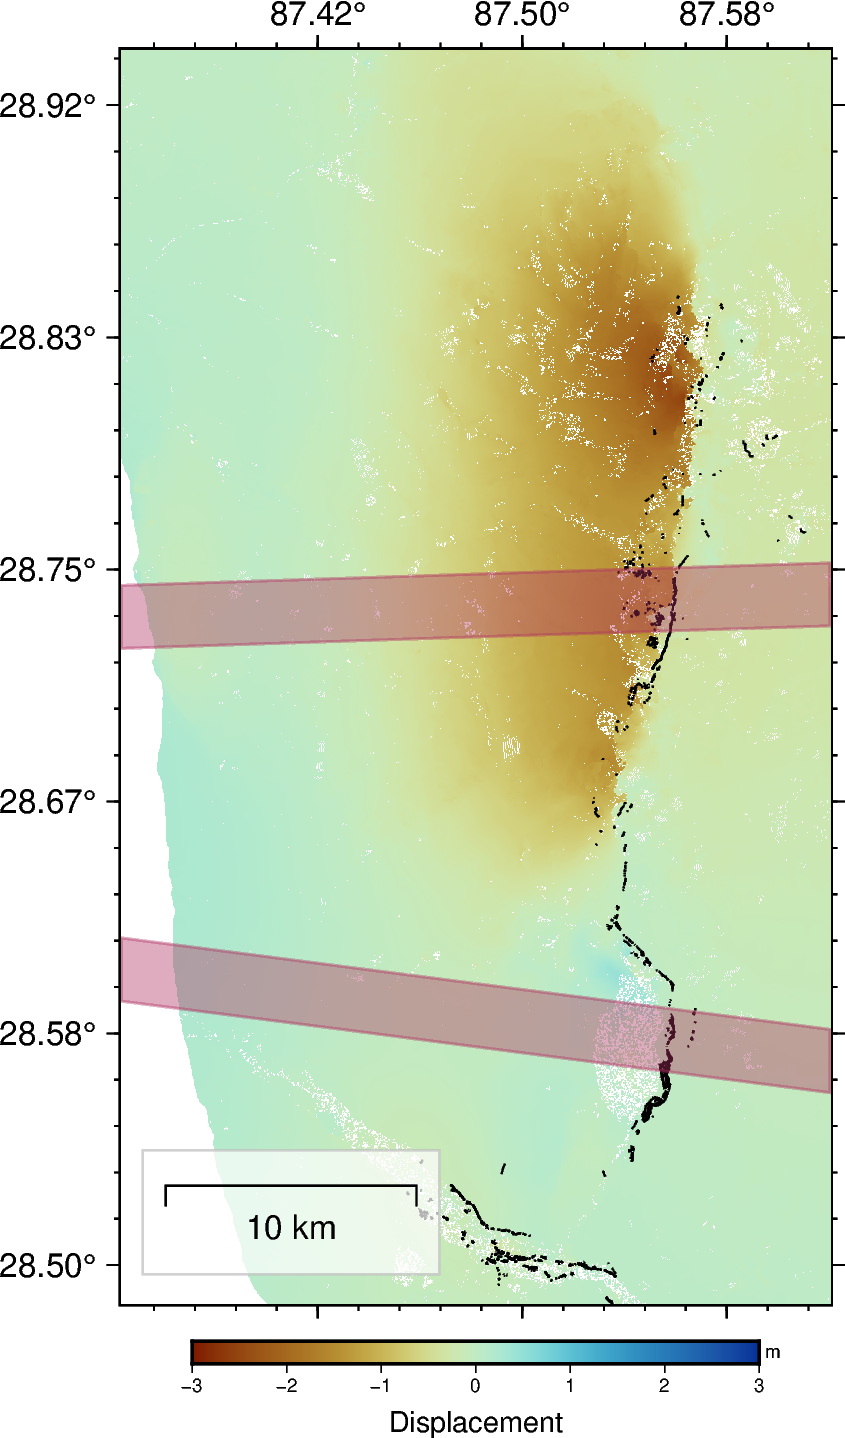

In [152]:
direct = 'LOS'
im = rioxarray.open_rasterio(f'/Volumes/Tibet/XizangWVProcessing/SupportingData/ALOS_ZoeYin/A2_A301_F2-7_los_ll.tiff')
im = im.rio.reproject("EPSG:4326")
im.data = im.data/1000

savef = f'/Users/chanagan/Library/CloudStorage/OneDrive-DOI/Desktop/Manuscripts/TibetJan2025/Figures/{direct}_map.pdf'

# Introductory figure base
fig = pygmt.Figure()

# Configuration for the 'current figure'.
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="ddd.xx")
pygmt.config(FONT_ANNOT="8p,Helvetica,black")

# Plot the base map of the main figure. 
fig.basemap(region=optical_region, projection="M6c", frame=["WNse", "af"])

# Colormap
pygmt.makecpt(cmap="roma", series=[-3, 3])
fig.grdimage(grid=im)
fig.colorbar(frame=["a1f1", "x+lDisplacement", "y+lm"])

# Faults
fig.plot(data='/Volumes/Tibet/XizangWVProcessing/GIS/Xizang_Mapping_31Mar2025_ALL/Xizang_Mapping_31Mar2025_ALLepsg4326.shp', pen="0.4p,black")
# Swath
fig.plot(data='/Volumes/Tibet/XizangWVProcessing/Profiles/TibetProfilesEW_20250107_profiles_2profiles.shp', pen="0.6p,maroon",fill="maroon", transparency=60)

# Scale Bar
fig.basemap(map_scale='JBL+w10k+o-2.5c/-1c+lkm',box="+c0.1/0.3+gwhite@30+p0.5p,grey@30,solid")

fig.savefig(savef,dpi=300)

fig.show()

# Calc Slope

In [2]:
import numpy as np
import pandas as pd
import rasterio

slope = rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPost10m.tif',mask=True)
slope = slope.read()[0]
slope[slope == -9999] = np.nan
len(slope[slope>20].flatten())/len(slope.flatten())

0.8192143776204481

# Calc Vert v Elevation

In [6]:
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import geopandas as gpd

In [90]:
# --- File Paths ---
ns_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/NS_displacement_merged1m.tif'
ew_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/EW_displacement_merged1m.tif'
ud_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged1m.tif'
el_path = '/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/DemsJuly2025/DemPost1m.tif'

In [7]:
import rasterio
from rasterio.windows import from_bounds
from rasterio.warp import transform_bounds

def crop_raster_in_memory(raster_path, min_lon, min_lat, max_lon, max_lat):
    """
    Crop a raster to a lat/lon bounding box entirely in memory.

    Parameters
    ----------
    raster_path : str
        Path to the raster file to crop.
    min_lon, min_lat, max_lon, max_lat : float
        Bounding box in geographic coordinates (EPSG:4326).

    Returns
    -------
    data : numpy.ma.MaskedArray
        Cropped raster data (masked array).
    transform : affine.Affine
        Affine transform for the cropped subset.
    meta : dict
        Updated raster metadata for the cropped subset.
    """
    with rasterio.open(raster_path, mask=True) as src:
        # Convert bounding box to raster CRS
        bbox_src = transform_bounds('EPSG:4326', src.crs, 
                                    min_lon, min_lat, max_lon, max_lat)
        # Define window from bounds
        window = from_bounds(*bbox_src, transform=src.transform)

        # Read cropped data
        data = src.read(1, window=window, masked=True)
        transform = src.window_transform(window)

        # Copy metadata and update to cropped subset
        meta = src.meta.copy()
        meta.update({
            "height": data.shape[0],
            "width": data.shape[1],
            "transform": transform
        })

    return data, transform, meta

In [91]:
# Define boxes for north and south regions. Clip displacements in the boxes, plot
n_box = [87.43,28.7,87.53,28.8]
s_box = [87.43,28.55,87.53,28.65]

In [110]:
# --- Define bounding box for normalization (edit these!) ---
transformer = Transformer.from_crs( "EPSG:32645","EPSG:4326", always_xy=True)
norm_box = [558774,3151721,560289,3200000]
norm_box = [transformer.transform(norm_box[0],norm_box[1])[0],
            transformer.transform(norm_box[0],norm_box[1])[1],
            transformer.transform(norm_box[2],norm_box[3])[0],
            transformer.transform(norm_box[2],norm_box[3])[1]]
ud_box_norm = crop_raster_in_memory(ud_path, norm_box[0], norm_box[1], norm_box[2], norm_box[3])
ud_box_norm = ud_box_norm[0].data.flatten()
ud_box_norm[ud_box_norm == -9999] = np.nan
ud_box_norm = np.nanmean(ud_box_norm)
ew_box_norm = crop_raster_in_memory(ew_path, norm_box[0], norm_box[1], norm_box[2], norm_box[3])
ew_box_norm = ew_box_norm[0].data.flatten()
ew_box_norm[ew_box_norm == -9999] = np.nan
ew_box_norm = np.nanmean(ew_box_norm)

In [112]:
from rasterio.plot import show
# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 10))

# --- Bounding box for plotting (UTM zone 45N) ---
plot_xmin, plot_xmax = 532947.5, 561093.5
plot_ymin, plot_ymax = 3151047.5, 3201094

# Optional: show a background map (e.g., NS or DEM)
with rasterio.open('/Volumes/Tibet/XizangWVProcessing/AmesStereoPipeline/micmac/UD_displacement_merged10m.tif') as src:
    img = show(src, ax=ax, cmap='Blues_r', alpha=0.9,vmin=-1.75, vmax=1.75)
    # Create colorbar
    cbar = plt.colorbar(img.get_images()[0], ax=ax, orientation='horizontal', pad=0.05,shrink=0.3)
    cbar.set_label('Vertical Displacement (m)')

    # set bounds
    bounds = src.bounds  # left, bottom, right, top

    # Set axis limits from raster bounds
    ax.set_xlim(bounds.left, bounds.right)
    ax.set_ylim(bounds.bottom, bounds.top)

# Add transparent box for normalization area
import matplotlib.patches as patches
from matplotlib.lines import Line2D
# --- Convert axis ticks to lon/lat labels ---
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:4326", "EPSG:32645", always_xy=True)
for xmin, ymin, xmax, ymax in [n_box, s_box, norm_box]:

    xmin, ymin = transformer.transform(xmin, ymin)
    xmax, ymax = transformer.transform(xmax, ymax)


    norm_box = patches.Rectangle(
        (xmin, ymin), xmax - xmin, ymax - ymin,
        linewidth=1.5,
        edgecolor='black',
        facecolor='gray',
        alpha=0.25,
        linestyle='--',
        label='Normalization Area'
    )
    ax.add_patch(norm_box)


# Get current ticks in projected coordinates
xticks = ax.get_xticks()
yticks = ax.get_yticks()

# Convert to lon/lat
transformer = Transformer.from_crs("EPSG:32645", "EPSG:4326", always_xy=True)
xticks_lon, _ = transformer.transform(xticks, np.full_like(xticks, yticks[0]))
_, yticks_lat = transformer.transform(np.full_like(yticks, xticks[0]), yticks)

# Set formatted tick labels
ax.set_xticklabels([f"{lon:.3f}" for lon in xticks_lon])
ax.set_yticklabels([f"{lat:.3f}" for lat in yticks_lat])

# Update labels
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")

# Set plot limits
ax.set_xlim(plot_xmin,plot_xmax)
ax.set_ylim(plot_ymin,plot_ymax)

ax.set_title("Horizontal Displacement Vectors")
ax.set_aspect('equal')
plt.rcParams.update({'font.size': 9})
plt.tight_layout()
plt.show()

/var/folders/ww/ssw0mtrs6cs5y2_npbqxcmbw0000gn/T/ipykernel_84529/1612522782.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{lon:.3f}" for lon in xticks_lon])
/var/folders/ww/ssw0mtrs6cs5y2_npbqxcmbw0000gn/T/ipykernel_84529/1612522782.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{lat:.3f}" for lat in yticks_lat])


In [113]:
# Get displacements from boxes and flatten to arrays for north and south samples
ud_box_n = crop_raster_in_memory(ud_path, n_box[0], n_box[1], n_box[2], n_box[3])
ud_box_s = crop_raster_in_memory(ud_path, s_box[0], s_box[1], s_box[2], s_box[3])

ew_box_n = crop_raster_in_memory(ew_path, n_box[0], n_box[1], n_box[2], n_box[3])
ew_box_s = crop_raster_in_memory(ew_path, s_box[0], s_box[1], s_box[2], s_box[3])

el_box_n = crop_raster_in_memory(el_path, n_box[0], n_box[1], n_box[2], n_box[3])
el_box_s = crop_raster_in_memory(el_path, s_box[0], s_box[1], s_box[2], s_box[3])

el_n = el_box_n[0].data.flatten()
el_n[el_n == -9999] = np.nan
ew_n = ew_box_n[0].data.flatten() 
ew_n[ew_n == -9999] = np.nan
ew_n = ew_n - ew_box_norm # remove footwall mean
ud_n = ud_box_n[0].data.flatten() 
ud_n[ud_n == -9999] = np.nan
ud_n = ud_n - ud_box_norm # remove footwall mean


el_s = el_box_s[0].data.flatten()
el_s[el_s == -9999] = np.nan
ew_s = ew_box_s[0].data.flatten() 
ew_s[ew_s == -9999] = np.nan
ew_s = ew_s - ew_box_norm # remove footwall mean
ud_s = ud_box_s[0].data.flatten() 
ud_s[ud_s == -9999] = np.nan
ud_s = ud_s - ud_box_norm # remove footwall mean


In [115]:
ratio_n = np.divide(ew_n,(ud_n+ew_n), out=np.full_like(ew_n, np.nan), where=(ud_n+ew_n)!=0)
np.nanmean(el_n), np.nanmean(ew_n), np.nanmean(ud_n), np.nanmean(ew_n)/np.nanmean(ud_n), np.nanmean(ratio_n)

(np.float32(5551.4966),
 np.float32(0.1409069),
 np.float32(-1.2940497),
 np.float32(-0.10888832),
 np.float32(-0.3040611))

In [116]:
ratio_s = np.divide(ew_s,(ud_s+ew_s), out=np.full_like(ew_s, np.nan), where=(ud_s+ew_s)!=0)
np.nanmean(el_s), np.nanmean(ew_s), np.nanmean(ud_s), np.nanmean(ew_s)/np.nanmean(ud_s),np.nanmean(ratio_s)

(np.float32(4218.083),
 np.float32(-0.5757257),
 np.float32(-0.4424531),
 np.float32(1.3012129),
 np.float32(0.59513736))

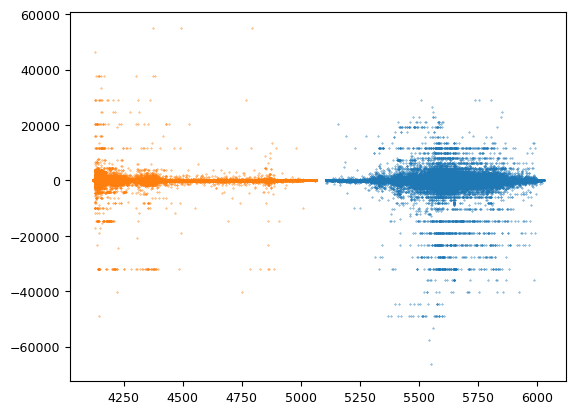

In [117]:
plt.scatter(el_n,ratio_n,s=0.1)
plt.scatter(el_s,ratio_s,s=0.1)